In [26]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import re

In [27]:
# Create function to find null values
def find_null_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            print(f'Column {column} has {df[column].isnull().sum()} null values')

In [28]:
# Create function to remove state abbreviation after city name
def remove_state_abbv(df):
    df['RegionName'] = [re.sub("(.*),.*", "\\1", str(x)) for x in df['RegionName']]

## Home Value Forecast Data


In [29]:
file_path1 = 'Resources/Zillow_HVF.csv'
hvf_df = pd.read_csv(file_path1, skiprows=[1])
hvf_df.head()

RegionID  SizeRank                          RegionName RegionType  \
0    394913         1                        New York, NY        Msa   
1    753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
2    394463         3                         Chicago, IL        Msa   
3    394514         4               Dallas-Fort Worth, TX        Msa   
4    394974         5                    Philadelphia, PA        Msa   

  StateName    BaseDate  2022-07-31  2022-09-30  2023-06-30  
0        NY  2022-06-30         0.8         2.2         4.8  
1        CA  2022-06-30         0.0         1.0         5.3  
2        IL  2022-06-30         0.9         2.6         5.1  
3        TX  2022-06-30         1.3         4.1        10.8  
4        PA  2022-06-30         1.0         2.6         6.2

In [30]:
hvf_df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
BaseDate       object
2022-07-31    float64
2022-09-30    float64
2023-06-30    float64
dtype: object

In [31]:
hvf_df.describe()

RegionID    SizeRank  2022-07-31  2022-09-30  2023-06-30
count     911.000000  911.000000  906.000000  908.000000  911.000000
mean   415271.058178  459.346872    1.073620    3.110573    7.164874
std     83362.123219  267.460151    0.556726    1.113354    2.718895
min    394297.000000    1.000000   -1.400000   -1.800000   -6.400000
25%    394547.500000  228.500000    0.800000    2.400000    5.400000
50%    394803.000000  456.000000    1.100000    3.000000    6.900000
75%    395050.500000  687.500000    1.400000    3.800000    8.800000
max    753929.000000  933.000000    4.500000   10.200000   16.700000

In [32]:
# Remove state abbreviation after city name
remove_state_abbv(hvf_df)
hvf_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

     BaseDate  2022-07-31  2022-09-30  2023-06-30  
0  2022-06-30         0.8         2.2         4.8  
1  2022-06-30         0.0         1.0         5.3  
2  2022-06-30         0.9         2.6         5.1  
3  2022-06-30         1.3         4.1        10.8  
4  2022-06-30         1.0         2.6         6.2

In [33]:
find_null_values(hvf_df)

Column 2022-07-31 has 5 null values
Column 2022-09-30 has 3 null values


In [34]:
hvf_df.dropna().reset_index(drop=True)
hvf_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

     BaseDate  2022-07-31  2022-09-30  2023-06-30  
0  2022-06-30         0.8         2.2         4.8  
1  2022-06-30         0.0         1.0         5.3  
2  2022-06-30         0.9         2.6         5.1  
3  2022-06-30         1.3         4.1        10.8  
4  2022-06-30         1.0         2.6         6.2

In [35]:
# Drop Columns to clean up dataframe
hvf_data = hvf_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'BaseDate'])
hvf_data.head()

RegionName StateName  2022-07-31  2022-09-30  \
0                        New York        NY         0.8         2.2   
1  Los Angeles-Long Beach-Anaheim        CA         0.0         1.0   
2                         Chicago        IL         0.9         2.6   
3               Dallas-Fort Worth        TX         1.3         4.1   
4                    Philadelphia        PA         1.0         2.6   

   2023-06-30  
0         4.8  
1         5.3  
2         5.1  
3        10.8  
4         6.2

## Home Value Index Data


In [36]:
file_path2 = 'Resources/Zillow_HVI.csv'
hvi_df = pd.read_csv(file_path2, skiprows=[1])
hvi_df.head()

RegionID  SizeRank                          RegionName RegionType  \
0    394913         1                        New York, NY        Msa   
1    753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
2    394463         3                         Chicago, IL        Msa   
3    394514         4               Dallas-Fort Worth, TX        Msa   
4    394974         5                    Philadelphia, PA        Msa   

  StateName  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  ...  \
0        NY    225516.0    226863.0    228076.0    230462.0    232684.0  ...   
1        CA    231193.0    231998.0    233231.0    235575.0    238089.0  ...   
2        IL    171271.0    171675.0    172198.0    173245.0    174354.0  ...   
3        TX    131555.0    131660.0    131748.0    131961.0    132186.0  ...   
4        PA    130664.0    131102.0    131365.0    132019.0    132548.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1    846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2    285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3    329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4    309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    594089.0    601248.0    608793.0    614826.0  
1    908424.0    927686.0    944296.0    945642.0  
2    302259.0    305752.0    309745.0    312752.0  
3    371655.0    381221.0    389992.0    397605.0  
4    324826.0    328526.0    332874.0    336380.0  

[5 rows x 275 columns]

In [37]:
hvi_df.describe()

RegionID    SizeRank     2000-01-31     2000-02-29     2000-03-31  \
count     907.000000  907.000000     441.000000     442.000000     443.000000   
mean   415362.621830  458.314223  111778.011338  112093.617647  112331.101580   
std     83534.501875  267.468546   53431.111974   53609.993189   53867.527434   
min    394297.000000    1.000000   34637.000000   34540.000000   34582.000000   
25%    394549.500000  227.500000   76892.000000   77166.500000   77393.000000   
50%    394805.000000  454.000000   99932.000000  100481.500000  100350.000000   
75%    395052.000000  686.500000  130664.000000  130645.750000  130591.000000   
max    753929.000000  933.000000  434391.000000  436998.000000  440726.000000   

          2000-04-30     2000-05-31     2000-06-30     2000-07-31  \
count     445.000000     447.000000     448.000000     449.000000   
mean   113175.939326  114006.814318  114535.830357  115242.314031   
std     54778.562436   55545.817953   56324.784252   57081.485879   
min     34548.000000   34685.000000   34784.000000   34899.000000   
25%     77814.000000   78188.500000   78469.000000   78814.000000   
50%    100898.000000  101454.000000  101819.000000  102328.000000   
75%    131259.000000  131808.500000  132394.000000  133053.000000   
max    451363.000000  461553.000000  473641.000000  482975.000000   

          2000-08-31  ...    2021-09-30    2021-10-31    2021-11-30  \
count     450.000000  ...  9.050000e+02  9.030000e+02  9.050000e+02   
mean   115922.871111  ...  2.352768e+05  2.383079e+05  2.409995e+05   
std     57925.516627  ...  1.586404e+05  1.613494e+05  1.635983e+05   
min     34965.000000  ...  3.163800e+04  3.171700e+04  3.167000e+04   
25%     79088.250000  ...  1.405830e+05  1.414260e+05  1.425110e+05   
50%    103034.000000  ...  1.865140e+05  1.873400e+05  1.895890e+05   
75%    133386.250000  ...  2.826970e+05  2.854000e+05  2.876470e+05   
max    495355.000000  ...  1.495619e+06  1.504507e+06  1.519156e+06   

         2021-12-31    2022-01-31    2022-02-28    2022-03-31    2022-04-30  \
count  9.000000e+02  9.040000e+02  9.040000e+02  9.050000e+02  9.070000e+02   
mean   2.443872e+05  2.486014e+05  2.528947e+05  2.561354e+05  2.595221e+05   
std    1.664305e+05  1.691907e+05  1.724755e+05  1.760918e+05  1.797084e+05   
min    3.225600e+04  3.296500e+04  3.399400e+04  3.447800e+04  3.490800e+04   
25%    1.440908e+05  1.470575e+05  1.497798e+05  1.508700e+05  1.526525e+05   
50%    1.920675e+05  1.950420e+05  1.977215e+05  1.997510e+05  2.017630e+05   
75%    2.907185e+05  2.942508e+05  3.011140e+05  3.041230e+05  3.065625e+05   
max    1.539982e+06  1.568421e+06  1.606876e+06  1.646124e+06  1.682233e+06   

         2022-05-31    2022-06-30  
count  9.070000e+02  9.070000e+02  
mean   2.624475e+05  2.654158e+05  
std    1.826319e+05  1.842372e+05  
min    3.507500e+04  3.540200e+04  
25%    1.543845e+05  1.563580e+05  
50%    2.048510e+05  2.077100e+05  
75%    3.089795e+05  3.131065e+05  
max    1.692646e+06  1.679555e+06  

[8 rows x 272 columns]

In [38]:
# find null values
find_null_values(hvi_df)

Column 2000-01-31 has 466 null values
Column 2000-02-29 has 465 null values
Column 2000-03-31 has 464 null values
Column 2000-04-30 has 462 null values
Column 2000-05-31 has 460 null values
Column 2000-06-30 has 459 null values
Column 2000-07-31 has 458 null values
Column 2000-08-31 has 457 null values
Column 2000-09-30 has 456 null values
Column 2000-10-31 has 456 null values
Column 2000-11-30 has 453 null values
Column 2000-12-31 has 452 null values
Column 2001-01-31 has 444 null values
Column 2001-02-28 has 444 null values
Column 2001-03-31 has 444 null values
Column 2001-04-30 has 442 null values
Column 2001-05-31 has 441 null values
Column 2001-06-30 has 440 null values
Column 2001-07-31 has 439 null values
Column 2001-08-31 has 439 null values
Column 2001-09-30 has 439 null values
Column 2001-10-31 has 438 null values
Column 2001-11-30 has 437 null values
Column 2001-12-31 has 436 null values
Column 2002-01-31 has 435 null values
Column 2002-02-28 has 435 null values
Column 2002-

In [39]:
# Remove state abbreviation after city name
remove_state_abbv(hvi_df)

In [40]:
hvi_df.head(10)

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   
5    394692         6                         Houston        Msa        TX   
6    395209         7                      Washington        Msa        DC   
7    394856         8           Miami-Fort Lauderdale        Msa        FL   
8    394347         9                         Atlanta        Msa        GA   
9    394404        10                          Boston        Msa        MA   

   2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  ...  \
0    225516.0    226863.0    228076.0    230462.0    232684.0  ...   
1    231193.0    231998.0    233231.0    235575.0    238089.0  ...   
2    171271.0    171675.0    172198.0    173245.0    174354.0  ...   
3    131555.0    131660.0    131748.0    131961.0    132186.0  ...   
4    130664.0    131102.0    131365.0    132019.0    132548.0  ...   
5    126519.0    126597.0    126478.0    126596.0    126604.0  ...   
6    193180.0    193427.0    193806.0    194612.0    195732.0  ...   
7    125671.0    126134.0    126548.0    127364.0    128034.0  ...   
8    154331.0    154844.0    155373.0    156442.0    157487.0  ...   
9    234051.0    235356.0    236623.0    238847.0    241059.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1    846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2    285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3    329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4    309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   
5    270390.0    274697.0    277870.0    281297.0    284760.0    289080.0   
6    520427.0    523310.0    526230.0    529647.0    533439.0    538507.0   
7    371434.0    379642.0    387320.0    394586.0    402632.0    410239.0   
8    316952.0    324392.0    331958.0    339799.0    347293.0    354110.0   
9    604952.0    609550.0    613899.0    618764.0    624260.0    631495.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    594089.0    601248.0    608793.0    614826.0  
1    908424.0    927686.0    944296.0    945642.0  
2    302259.0    305752.0    309745.0    312752.0  
3    371655.0    381221.0    389992.0    397605.0  
4    324826.0    328526.0    332874.0    336380.0  
5    294445.0    300457.0    306044.0    310239.0  
6    544142.0    549575.0    553983.0    556296.0  
7    420478.0    431182.0    444697.0    456489.0  
8    361285.0    368733.0    375982.0    381361.0  
9    639975.0    649831.0    657835.0    663494.0  

[10 rows x 275 columns]

In [41]:
# Get column dates from last two years only
hvi_new = hvi_df[hvi_df.columns[np.concatenate([range(0,5),range(250,275)])]]
hvi_new

RegionID  SizeRank                      RegionName RegionType StateName  \
0      394913         1                        New York        Msa        NY   
1      753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2      394463         3                         Chicago        Msa        IL   
3      394514         4               Dallas-Fort Worth        Msa        TX   
4      394974         5                    Philadelphia        Msa        PA   
..        ...       ...                             ...        ...       ...   
902    394767       929                          Lamesa        Msa        TX   
903    753874       930                           Craig        Msa        CO   
904    394968       931                           Pecos        Msa        TX   
905    395188       932                          Vernon        Msa        TX   
906    394743       933                       Ketchikan        Msa        AK   

     2020-06-30  2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  \
0      488763.0    489984.0    492585.0    497110.0    502622.0  ...   
1      690755.0    692496.0    701667.0    712282.0    722246.0  ...   
2      244909.0    245927.0    247603.0    250506.0    253382.0  ...   
3      263317.0    264380.0    266755.0    269375.0    272502.0  ...   
4      257611.0    259242.0    261868.0    265047.0    268749.0  ...   
..          ...         ...         ...         ...         ...  ...   
902     79276.0     79396.0     79483.0     79737.0     80109.0  ...   
903    203800.0    203694.0    204158.0    204861.0    205863.0  ...   
904    135199.0    136440.0    136826.0    138264.0    138420.0  ...   
905     72385.0     72403.0     72365.0     72487.0     72491.0  ...   
906    312097.0    312538.0    313278.0    314238.0    315328.0  ...   

     2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0      567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1      846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2      285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3      329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4      309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   
..          ...         ...         ...         ...         ...         ...   
902     90901.0     91860.0     92441.0     94055.0     95700.0     97936.0   
903    240977.0    243967.0    245587.0    249005.0    251980.0    254360.0   
904    165382.0    170185.0    171244.0    174065.0    176831.0    179332.0   
905     79200.0     79551.0     79838.0     81980.0     84202.0     86827.0   
906    338498.0    340460.0    342031.0    347628.0    353298.0    357992.0   

     2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0      594089.0    601248.0    608793.0    614826.0  
1      908424.0    927686.0    944296.0    945642.0  
2      302259.0    305752.0    309745.0    312752.0  
3      371655.0    381221.0    389992.0    397605.0  
4      324826.0    328526.0    332874.0    336380.0  
..          ...         ...         ...         ...  
902     99128.0    100176.0    101259.0    102796.0  
903    254611.0    254762.0    255699.0    259578.0  
904    181149.0    183894.0    186876.0    190000.0  
905     87516.0     88168.0     88454.0     89621.0  
906    358224.0    358698.0    360495.0    363980.0  

[907 rows x 30 columns]

In [42]:
# Drop columns to clean up dataframe
hvi_data = hvi_new.drop(columns=['RegionID', 'SizeRank', 'RegionType']).reset_index(drop=True)
hvi_data.head()

RegionName StateName  2020-06-30  2020-07-31  \
0                        New York        NY    488763.0    489984.0   
1  Los Angeles-Long Beach-Anaheim        CA    690755.0    692496.0   
2                         Chicago        IL    244909.0    245927.0   
3               Dallas-Fort Worth        TX    263317.0    264380.0   
4                    Philadelphia        PA    257611.0    259242.0   

   2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  \
0    492585.0    497110.0    502622.0    508677.0    514528.0    519394.0   
1    701667.0    712282.0    722246.0    729736.0    736072.0    741208.0   
2    247603.0    250506.0    253382.0    256202.0    258442.0    259983.0   
3    266755.0    269375.0    272502.0    274906.0    277528.0    279871.0   
4    261868.0    265047.0    268749.0    272289.0    275992.0    279242.0   

   ...  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0  ...    567599.0    572173.0    575746.0    579000.0    582977.0   
1  ...    846547.0    851306.0    858511.0    867810.0    878593.0   
2  ...    285566.0    288245.0    290960.0    293700.0    296355.0   
3  ...    329869.0    336001.0    341515.0    347444.0    354921.0   
4  ...    309169.0    311638.0    314135.0    316430.0    318994.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    587634.0    594089.0    601248.0    608793.0    614826.0  
1    890931.0    908424.0    927686.0    944296.0    945642.0  
2    298940.0    302259.0    305752.0    309745.0    312752.0  
3    363495.0    371655.0    381221.0    389992.0    397605.0  
4    321556.0    324826.0    328526.0    332874.0    336380.0  

[5 rows x 27 columns]

In [43]:
hvi_data = hvi_data.dropna().reset_index(drop=True)
hvi_data.head()

RegionName StateName  2020-06-30  2020-07-31  \
0                        New York        NY    488763.0    489984.0   
1  Los Angeles-Long Beach-Anaheim        CA    690755.0    692496.0   
2                         Chicago        IL    244909.0    245927.0   
3               Dallas-Fort Worth        TX    263317.0    264380.0   
4                    Philadelphia        PA    257611.0    259242.0   

   2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  \
0    492585.0    497110.0    502622.0    508677.0    514528.0    519394.0   
1    701667.0    712282.0    722246.0    729736.0    736072.0    741208.0   
2    247603.0    250506.0    253382.0    256202.0    258442.0    259983.0   
3    266755.0    269375.0    272502.0    274906.0    277528.0    279871.0   
4    261868.0    265047.0    268749.0    272289.0    275992.0    279242.0   

   ...  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0  ...    567599.0    572173.0    575746.0    579000.0    582977.0   
1  ...    846547.0    851306.0    858511.0    867810.0    878593.0   
2  ...    285566.0    288245.0    290960.0    293700.0    296355.0   
3  ...    329869.0    336001.0    341515.0    347444.0    354921.0   
4  ...    309169.0    311638.0    314135.0    316430.0    318994.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    587634.0    594089.0    601248.0    608793.0    614826.0  
1    890931.0    908424.0    927686.0    944296.0    945642.0  
2    298940.0    302259.0    305752.0    309745.0    312752.0  
3    363495.0    371655.0    381221.0    389992.0    397605.0  
4    321556.0    324826.0    328526.0    332874.0    336380.0  

[5 rows x 27 columns]

In [44]:
# add date column labels to list to use in fixing rent dataframe column labels
labels = (hvi_data.columns[2:].values.tolist())
print(labels)

['2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30']


In [45]:
# Reorder data to have all the dates in one column
hvi_by_month = hvi_data.melt(id_vars=['RegionName', 'StateName'],
                                          var_name='Date',
                                          value_name='HVI')
hvi_by_month.head()

RegionName StateName        Date       HVI
0                        New York        NY  2020-06-30  488763.0
1  Los Angeles-Long Beach-Anaheim        CA  2020-06-30  690755.0
2                         Chicago        IL  2020-06-30  244909.0
3               Dallas-Fort Worth        TX  2020-06-30  263317.0
4                    Philadelphia        PA  2020-06-30  257611.0

In [46]:
# Rename RegionName and StateName columns
hvi_by_month.rename(columns={'RegionName':'City', 'StateName':'State'}, inplace=True)
hvi_by_month.head()

City State        Date       HVI
0                        New York    NY  2020-06-30  488763.0
1  Los Angeles-Long Beach-Anaheim    CA  2020-06-30  690755.0
2                         Chicago    IL  2020-06-30  244909.0
3               Dallas-Fort Worth    TX  2020-06-30  263317.0
4                    Philadelphia    PA  2020-06-30  257611.0

In [47]:
# Reorder DataFrames so Date column is first
hvi_by_month = hvi_by_month[['Date', 'City', 'State', 'HVI']]
hvi_by_month.head()

Date                            City State       HVI
0  2020-06-30                        New York    NY  488763.0
1  2020-06-30  Los Angeles-Long Beach-Anaheim    CA  690755.0
2  2020-06-30                         Chicago    IL  244909.0
3  2020-06-30               Dallas-Fort Worth    TX  263317.0
4  2020-06-30                    Philadelphia    PA  257611.0

In [48]:
# Get the monthly percentage of change for HVI for each city
hvi_by_month['%Change_HVI'] = hvi_by_month.groupby('City')['HVI'].pct_change().mul(100).round(2)
hvi_by_month

Date                            City State       HVI  %Change_HVI
0      2020-06-30                        New York    NY  488763.0          NaN
1      2020-06-30  Los Angeles-Long Beach-Anaheim    CA  690755.0          NaN
2      2020-06-30                         Chicago    IL  244909.0          NaN
3      2020-06-30               Dallas-Fort Worth    TX  263317.0          NaN
4      2020-06-30                    Philadelphia    PA  257611.0          NaN
...           ...                             ...   ...       ...          ...
16620  2022-06-30                         Andrews    TX  221347.0         1.44
16621  2022-06-30                          Zapata    TX  117079.0         0.85
16622  2022-06-30                      Vermillion    SD  231123.0         1.12
16623  2022-06-30                           Pecos    TX  190000.0         1.67
16624  2022-06-30                       Ketchikan    AK  363980.0         0.97

[16625 rows x 5 columns]

In [149]:
hvi_by_month.drop(hvi_by_month.index[hvi_by_month['Date'] == '2020-06-30'], inplace=True)
hvi_by_month

Date                            City State       HVI  %Change_HVI
665    2020-07-31                        New York    NY  489984.0         0.25
666    2020-07-31  Los Angeles-Long Beach-Anaheim    CA  692496.0         0.25
667    2020-07-31                         Chicago    IL  245927.0         0.42
668    2020-07-31               Dallas-Fort Worth    TX  264380.0         0.40
669    2020-07-31                    Philadelphia    PA  259242.0         0.63
...           ...                             ...   ...       ...          ...
16620  2022-06-30                         Andrews    TX  221347.0         1.44
16621  2022-06-30                          Zapata    TX  117079.0         0.85
16622  2022-06-30                      Vermillion    SD  231123.0         1.12
16623  2022-06-30                           Pecos    TX  190000.0         1.67
16624  2022-06-30                       Ketchikan    AK  363980.0         0.97

[15960 rows x 5 columns]

In [150]:
hvi_data = hvi_by_month

In [151]:
output_path = 'Resources/hvi_data.csv'
hvi_data.to_csv(output_path, index=False)

## Rent Index Data


In [51]:
file_path3 = 'Resources/Zillow_Rent_Index.csv'
rent_df = pd.read_csv(file_path3, skiprows=[1])
rent_df.head()

RegionID                          RegionName  SizeRank  2014-01  2014-02  \
0    394913                        New York, NY         1   2306.0     2335   
1    753899  Los Angeles-Long Beach-Anaheim, CA         2   1815.0     1846   
2    394463                         Chicago, IL         3   1464.0     1477   
3    394514               Dallas-Fort Worth, TX         4   1105.0     1130   
4    394974                    Philadelphia, PA         5   1350.0     1316   

   2014-03  2014-04  2014-05  2014-06  2014-07  ...  2021-09  2021-10  \
0   2342.0     2348     2382     2400     2418  ...     2799     2826   
1   1833.0     1842     1865     1885     1903  ...     2708     2735   
2   1478.0     1483     1499     1514     1522  ...     1809     1813   
3   1136.0     1152     1147     1150     1155  ...     1667     1681   
4   1337.0     1340     1349     1360     1365  ...     1736     1751   

   2021-11  2021-12  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  
0     2852     2884     2917     2970     3019     3072     3135     3186  
1     2759     2781     2801     2834     2863     2900     2935     2951  
2     1818     1832     1846     1860     1883     1907     1931     1947  
3     1700     1710     1719     1735     1744     1771     1802     1825  
4     1766     1788     1784     1794     1808     1821     1838     1852  

[5 rows x 105 columns]

In [52]:
# Remove state abbreviation after city name
remove_state_abbv(rent_df)
rent_df.head()

RegionID                      RegionName  SizeRank  2014-01  2014-02  \
0    394913                        New York         1   2306.0     2335   
1    753899  Los Angeles-Long Beach-Anaheim         2   1815.0     1846   
2    394463                         Chicago         3   1464.0     1477   
3    394514               Dallas-Fort Worth         4   1105.0     1130   
4    394974                    Philadelphia         5   1350.0     1316   

   2014-03  2014-04  2014-05  2014-06  2014-07  ...  2021-09  2021-10  \
0   2342.0     2348     2382     2400     2418  ...     2799     2826   
1   1833.0     1842     1865     1885     1903  ...     2708     2735   
2   1478.0     1483     1499     1514     1522  ...     1809     1813   
3   1136.0     1152     1147     1150     1155  ...     1667     1681   
4   1337.0     1340     1349     1360     1365  ...     1736     1751   

   2021-11  2021-12  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  
0     2852     2884     2917     2970     3019     3072     3135     3186  
1     2759     2781     2801     2834     2863     2900     2935     2951  
2     1818     1832     1846     1860     1883     1907     1931     1947  
3     1700     1710     1719     1735     1744     1771     1802     1825  
4     1766     1788     1784     1794     1808     1821     1838     1852  

[5 rows x 105 columns]

In [53]:
rent_df.describe()

RegionID    SizeRank      2014-01      2014-02      2014-03  \
count     109.000000  109.000000   102.000000   109.000000   107.000000   
mean   404660.293578   62.697248  1116.441176  1125.422018  1133.224299   
std     59026.851680   55.567194   316.520206   327.027134   327.270337   
min    394304.000000    1.000000   613.000000   659.000000   672.000000   
25%    394514.000000   28.000000   929.000000   939.000000   944.500000   
50%    394816.000000   55.000000  1021.000000  1028.000000  1028.000000   
75%    395045.000000   82.000000  1164.000000  1188.000000  1181.000000   
max    753924.000000  382.000000  2306.000000  2335.000000  2342.000000   

           2014-04      2014-05      2014-06      2014-07      2014-08  ...  \
count   109.000000   109.000000   109.000000   109.000000   109.000000  ...   
mean   1130.733945  1141.495413  1150.669725  1158.467890  1161.266055  ...   
std     330.105388   338.992560   348.215319   351.874835   356.829652  ...   
min     678.000000   692.000000   681.000000   666.000000   676.000000  ...   
25%     935.000000   944.000000   949.000000   951.000000   951.000000  ...   
50%    1022.000000  1030.000000  1037.000000  1047.000000  1052.000000  ...   
75%    1186.000000  1198.000000  1208.000000  1213.000000  1223.000000  ...   
max    2348.000000  2382.000000  2439.000000  2480.000000  2520.000000  ...   

           2021-09      2021-10      2021-11      2021-12      2022-01  \
count   109.000000   109.000000   109.000000   109.000000   109.000000   
mean   1634.366972  1646.284404  1660.513761  1672.422018  1674.440367   
std     467.344362   471.811758   475.375146   480.499225   486.632693   
min     909.000000   917.000000   919.000000   922.000000   921.000000   
25%    1298.000000  1310.000000  1313.000000  1327.000000  1318.000000   
50%    1533.000000  1545.000000  1568.000000  1577.000000  1563.000000   
75%    1795.000000  1803.000000  1812.000000  1824.000000  1846.000000   
max    3115.000000  3110.000000  3117.000000  3130.000000  3157.000000   

           2022-02      2022-03      2022-04      2022-05      2022-06  
count   109.000000   109.000000   109.000000   109.000000   109.000000  
mean   1690.990826  1709.844037  1730.495413  1753.541284  1767.385321  
std     489.365793   495.117797   503.127342   511.023637   513.911830  
min     931.000000   943.000000   943.000000   950.000000   960.000000  
25%    1343.000000  1357.000000  1372.000000  1386.000000  1389.000000  
50%    1579.000000  1611.000000  1629.000000  1650.000000  1656.000000  
75%    1853.000000  1883.000000  1904.000000  1931.000000  1946.000000  
max    3196.000000  3221.000000  3267.000000  3310.000000  3361.000000  

[8 rows x 104 columns]

In [54]:
# find null values
find_null_values(rent_df)

Column 2014-01 has 7 null values
Column 2014-03 has 2 null values
Column 2014-11 has 1 null values
Column 2016-03 has 1 null values


In [55]:
# Select date columns from the last two years
rent_new = rent_df[rent_df.columns[np.concatenate([range(0,3),range(80,105)])]]
rent_new

RegionID                      RegionName  SizeRank  2020-06  2020-07  \
0      394913                        New York         1     2694     2663   
1      753899  Los Angeles-Long Beach-Anaheim         2     2446     2446   
2      394463                         Chicago         3     1727     1723   
3      394514               Dallas-Fort Worth         4     1428     1431   
4      394974                    Philadelphia         5     1589     1590   
..        ...                             ...       ...      ...      ...   
104    394405                         Boulder       162     1860     1870   
105    394483                 College Station       192     1189     1169   
106    394623                     Gainesville       229     1240     1234   
107    395098                    Sierra Vista       309      916      924   
108    395080                         Sebring       382      970      989   

     2020-08  2020-09  2020-10  2020-11  2020-12  ...  2021-09  2021-10  \
0       2605     2549     2509     2488     2478  ...     2799     2826   
1       2438     2441     2449     2452     2448  ...     2708     2735   
2       1711     1693     1672     1659     1652  ...     1809     1813   
3       1432     1434     1439     1442     1445  ...     1667     1681   
4       1593     1593     1592     1594     1599  ...     1736     1751   
..       ...      ...      ...      ...      ...  ...      ...      ...   
104     1868     1876     1884     1880     1894  ...     2067     2073   
105     1159     1189     1214     1226     1230  ...     1237     1256   
106     1246     1281     1267     1280     1312  ...     1533     1532   
107      923      931      948      962      970  ...     1118     1175   
108      986     1001     1005     1016     1068  ...     1165     1160   

     2021-11  2021-12  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  
0       2852     2884     2917     2970     3019     3072     3135     3186  
1       2759     2781     2801     2834     2863     2900     2935     2951  
2       1818     1832     1846     1860     1883     1907     1931     1947  
3       1700     1710     1719     1735     1744     1771     1802     1825  
4       1766     1788     1784     1794     1808     1821     1838     1852  
..       ...      ...      ...      ...      ...      ...      ...      ...  
104     2080     2104     2131     2147     2185     2206     2219     2221  
105     1296     1310     1318     1333     1346     1353     1354     1356  
106     1561     1583     1600     1605     1615     1606     1627     1652  
107     1169     1152     1066     1108     1213     1237     1224     1171  
108     1200     1208     1212     1211     1229     1264     1284     1299  

[109 rows x 28 columns]

In [56]:
# Drop Columns to clean up dataframe
rent_data = rent_new.drop(columns=['RegionID', 'SizeRank']).reset_index(drop=True)
rent_data.head()

RegionName  2020-06  2020-07  2020-08  2020-09  \
0                        New York     2694     2663     2605     2549   
1  Los Angeles-Long Beach-Anaheim     2446     2446     2438     2441   
2                         Chicago     1727     1723     1711     1693   
3               Dallas-Fort Worth     1428     1431     1432     1434   
4                    Philadelphia     1589     1590     1593     1593   

   2020-10  2020-11  2020-12  2021-01  2021-02  ...  2021-09  2021-10  \
0     2509     2488     2478     2479     2484  ...     2799     2826   
1     2449     2452     2448     2448     2457  ...     2708     2735   
2     1672     1659     1652     1651     1656  ...     1809     1813   
3     1439     1442     1445     1450     1459  ...     1667     1681   
4     1592     1594     1599     1597     1599  ...     1736     1751   

   2021-11  2021-12  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  
0     2852     2884     2917     2970     3019     3072     3135     3186  
1     2759     2781     2801     2834     2863     2900     2935     2951  
2     1818     1832     1846     1860     1883     1907     1931     1947  
3     1700     1710     1719     1735     1744     1771     1802     1825  
4     1766     1788     1784     1794     1808     1821     1838     1852  

[5 rows x 26 columns]

In [57]:
# Rename date columns to match format from other dataframes
rent_data.columns.values[1:] = labels
rent_data.head()

RegionName  2020-06-30  2020-07-31  2020-08-31  \
0                        New York        2694        2663        2605   
1  Los Angeles-Long Beach-Anaheim        2446        2446        2438   
2                         Chicago        1727        1723        1711   
3               Dallas-Fort Worth        1428        1431        1432   
4                    Philadelphia        1589        1590        1593   

   2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  2021-02-28  \
0        2549        2509        2488        2478        2479        2484   
1        2441        2449        2452        2448        2448        2457   
2        1693        1672        1659        1652        1651        1656   
3        1434        1439        1442        1445        1450        1459   
4        1593        1592        1594        1599        1597        1599   

   ...  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0  ...        2799        2826        2852        2884        2917   
1  ...        2708        2735        2759        2781        2801   
2  ...        1809        1813        1818        1832        1846   
3  ...        1667        1681        1700        1710        1719   
4  ...        1736        1751        1766        1788        1784   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0        2970        3019        3072        3135        3186  
1        2834        2863        2900        2935        2951  
2        1860        1883        1907        1931        1947  
3        1735        1744        1771        1802        1825  
4        1794        1808        1821        1838        1852  

[5 rows x 26 columns]

In [58]:
# Reorder dataframe to have dates in one column
rent_data_by_month = rent_data.melt(id_vars=['RegionName'],
                                          var_name='Date',
                                          value_name='Avg_Rent')
rent_data_by_month

RegionName        Date  Avg_Rent
0                           New York  2020-06-30      2694
1     Los Angeles-Long Beach-Anaheim  2020-06-30      2446
2                            Chicago  2020-06-30      1727
3                  Dallas-Fort Worth  2020-06-30      1428
4                       Philadelphia  2020-06-30      1589
...                              ...         ...       ...
2720                         Boulder  2022-06-30      2221
2721                 College Station  2022-06-30      1356
2722                     Gainesville  2022-06-30      1652
2723                    Sierra Vista  2022-06-30      1171
2724                         Sebring  2022-06-30      1299

[2725 rows x 3 columns]

In [59]:
# Change RegionName column name
rent_data_by_month.rename(columns={'RegionName':'City'}, inplace=True)
rent_data_by_month.head()

City        Date  Avg_Rent
0                        New York  2020-06-30      2694
1  Los Angeles-Long Beach-Anaheim  2020-06-30      2446
2                         Chicago  2020-06-30      1727
3               Dallas-Fort Worth  2020-06-30      1428
4                    Philadelphia  2020-06-30      1589

In [60]:
# Reorder columns to move Date to first
rent_data_by_month = rent_data_by_month[['Date', 'City', 'Avg_Rent']]
rent_data_by_month.head()

Date                            City  Avg_Rent
0  2020-06-30                        New York      2694
1  2020-06-30  Los Angeles-Long Beach-Anaheim      2446
2  2020-06-30                         Chicago      1727
3  2020-06-30               Dallas-Fort Worth      1428
4  2020-06-30                    Philadelphia      1589

In [61]:
# Get the monthly percentage of change for Rent for each city
rent_data_by_month['%Change_Rent'] = rent_data_by_month.groupby('City')['Avg_Rent'].pct_change().mul(100).round(2)
rent_data_by_month

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date                            City  Avg_Rent  %Change_Rent
0     2020-06-30                        New York      2694           NaN
1     2020-06-30  Los Angeles-Long Beach-Anaheim      2446           NaN
2     2020-06-30                         Chicago      1727           NaN
3     2020-06-30               Dallas-Fort Worth      1428           NaN
4     2020-06-30                    Philadelphia      1589           NaN
...          ...                             ...       ...           ...
2720  2022-06-30                         Boulder      2221          0.09
2721  2022-06-30                 College Station      1356          0.15
2722  2022-06-30                     Gainesville      1652          1.54
2723  2022-06-30                    Sierra Vista      1171         -4.33
2724  2022-06-30                         Sebring      1299          1.17

[2725 rows x 4 columns]

In [125]:
#rent_data_by_month['%Change_Rent'] = rent_data_by_month['%Change_Rent'].apply(pd.to_numeric, errors='coerce')
rent_data = rent_data_by_month.dropna().reset_index(drop=True)
rent_data.head()

Date                            City  Avg_Rent  %Change_Rent
0  2020-07-31                        New York      2663         -1.15
1  2020-07-31  Los Angeles-Long Beach-Anaheim      2446          0.00
2  2020-07-31                         Chicago      1723         -0.23
3  2020-07-31               Dallas-Fort Worth      1431          0.21
4  2020-07-31                    Philadelphia      1590          0.06

In [63]:
output_path = 'Resources/rent_data.csv'
rent_data.to_csv(output_path, index=False)


## List Price Data

In [64]:
file_path4 = 'Resources/Zillow_Med_List_Price.csv'
list_Price_df = pd.read_csv(file_path4, skiprows=[1])
list_Price_df

RegionID  SizeRank                          RegionName RegionType  \
0     394913         1                        New York, NY        Msa   
1     753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
2     394463         3                         Chicago, IL        Msa   
3     394514         4               Dallas-Fort Worth, TX        Msa   
4     394974         5                    Philadelphia, PA        Msa   
..       ...       ...                                 ...        ...   
89    394528        90                   Daytona Beach, FL        Msa   
90    394531        91                      Des Moines, IA        Msa   
91    395006       100                           Provo, UT        Msa   
92    394549       104                          Durham, NC        Msa   
93    394602       159                    Fort Collins, CO        Msa   

   StateName  2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  \
0         NY    517967.0    523000.0    534333.0    544667.0    554667.0  ...   
1         CA    798670.0    804333.0    821000.0    838000.0    849667.0  ...   
2         IL    301333.0    305967.0    319467.0    336133.0    346133.0  ...   
3         TX    341634.0    345000.0    351633.0    359633.0    365967.0  ...   
4         PA    252633.0    249633.0    253667.0    260633.0    270133.0  ...   
..       ...         ...         ...         ...         ...         ...  ...   
89        FL    269600.0    270267.0    271933.0    275250.0    280280.0  ...   
90        IA    273284.0    277651.0    283797.0    288616.0    290719.0  ...   
91        UT    384442.0    392308.0    402985.0    408117.0    404294.0  ...   
92        NC    359817.0    363902.0    372943.0    382014.0    386264.0  ...   
93        CO    433808.0    436650.0    438694.0    441485.0    445874.0  ...   

    2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0     642000.0    640667.0    644333.0    647967.0    655967.0    668967.0   
1     959300.0    946633.0    946667.0    950000.0    958333.0    973333.0   
2     341630.0    334933.0    329933.0    324133.0    320133.0    321183.0   
3     399630.0    399967.0    403667.0    410167.0    417500.0    423800.0   
4     331267.0    329633.0    329633.0    326333.0    321333.0    316667.0   
..         ...         ...         ...         ...         ...         ...   
89    344966.0    351133.0    355047.0    355080.0    355247.0    362667.0   
90    319367.0    316487.0    317439.0    320773.0    327351.0    336995.0   
91    552313.0    552280.0    552280.0    563627.0    586960.0    622963.0   
92    471633.0    474967.0    475000.0    472253.0    471253.0    479553.0   
93    518225.0    534933.0    552967.0    565083.0    568383.0    560167.0   

    2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0     685000.0    695000.0    698667.0    697667.0  
1     990000.0    998333.0    999999.0    999666.0  
2     328650.0    339317.0    348267.0    354633.0  
3     436633.0    453963.0    473663.0    485997.0  
4     315000.0    318333.0    326333.0    334633.0  
..         ...         ...         ...         ...  
89    375833.0    389500.0    399800.0    409633.0  
90    347962.0    356798.0    357468.0    358835.0  
91    659967.0    686667.0    684967.0    669300.0  
92    502300.0    523300.0    531667.0    520000.0  
93    548050.0    546383.0    560230.0    580230.0  

[94 rows x 59 columns]

In [65]:
# Remove state abbreviation after city name
remove_state_abbv(list_Price_df)
list_Price_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  \
0    517967.0    523000.0    534333.0    544667.0    554667.0  ...   
1    798670.0    804333.0    821000.0    838000.0    849667.0  ...   
2    301333.0    305967.0    319467.0    336133.0    346133.0  ...   
3    341634.0    345000.0    351633.0    359633.0    365967.0  ...   
4    252633.0    249633.0    253667.0    260633.0    270133.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    642000.0    640667.0    644333.0    647967.0    655967.0    668967.0   
1    959300.0    946633.0    946667.0    950000.0    958333.0    973333.0   
2    341630.0    334933.0    329933.0    324133.0    320133.0    321183.0   
3    399630.0    399967.0    403667.0    410167.0    417500.0    423800.0   
4    331267.0    329633.0    329633.0    326333.0    321333.0    316667.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    685000.0    695000.0    698667.0    697667.0  
1    990000.0    998333.0    999999.0    999666.0  
2    328650.0    339317.0    348267.0    354633.0  
3    436633.0    453963.0    473663.0    485997.0  
4    315000.0    318333.0    326333.0    334633.0  

[5 rows x 59 columns]

In [66]:
# Select date columns from the last two years
new_list_Price_df = list_Price_df[list_Price_df.columns[np.concatenate([range(0,5),range(34,59)])]]
new_list_Price_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2020-06-30  2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  \
0    602296.0    612596.0    629263.0    642633.0    649333.0  ...   
1    895333.0    927667.0    958000.0    971000.0    975667.0  ...   
2    336833.0    343800.0    348800.0    349967.0    349667.0  ...   
3    348133.0    354800.0    358133.0    359767.0    359096.0  ...   
4    311333.0    323333.0    333000.0    336333.0    338000.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    642000.0    640667.0    644333.0    647967.0    655967.0    668967.0   
1    959300.0    946633.0    946667.0    950000.0    958333.0    973333.0   
2    341630.0    334933.0    329933.0    324133.0    320133.0    321183.0   
3    399630.0    399967.0    403667.0    410167.0    417500.0    423800.0   
4    331267.0    329633.0    329633.0    326333.0    321333.0    316667.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    685000.0    695000.0    698667.0    697667.0  
1    990000.0    998333.0    999999.0    999666.0  
2    328650.0    339317.0    348267.0    354633.0  
3    436633.0    453963.0    473663.0    485997.0  
4    315000.0    318333.0    326333.0    334633.0  

[5 rows x 30 columns]

In [67]:
new_list_Price_df.describe()

RegionID    SizeRank    2020-06-30    2020-07-31    2020-08-31  \
count      94.000000   94.000000  9.400000e+01  9.400000e+01  9.400000e+01   
mean   406233.648936   48.393617  3.744009e+05  3.832610e+05  3.885082e+05   
std     63466.030695   29.566844  1.739903e+05  1.788782e+05  1.827189e+05   
min    394304.000000    1.000000  1.782670e+05  1.843000e+05  1.873330e+05   
25%    394515.750000   24.250000  2.770330e+05  2.829358e+05  2.867770e+05   
50%    394829.500000   47.500000  3.246580e+05  3.340880e+05  3.414665e+05   
75%    395029.500000   70.750000  3.977992e+05  4.046405e+05  4.124182e+05   
max    753924.000000  159.000000  1.209333e+06  1.238000e+06  1.255000e+06   

         2020-09-30    2020-10-31    2020-11-30    2020-12-31    2021-01-31  \
count  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01   
mean   3.883615e+05  3.866228e+05  3.845070e+05  3.839049e+05  3.839141e+05   
std    1.838956e+05  1.839085e+05  1.841091e+05  1.843206e+05  1.846248e+05   
min    1.840000e+05  1.813000e+05  1.742830e+05  1.692830e+05  1.626170e+05   
25%    2.855888e+05  2.794792e+05  2.738290e+05  2.747812e+05  2.737692e+05   
50%    3.381500e+05  3.365160e+05  3.340430e+05  3.297465e+05  3.288570e+05   
75%    4.172078e+05  4.097558e+05  4.044462e+05  4.071722e+05  4.108132e+05   
max    1.254983e+06  1.248317e+06  1.248317e+06  1.231333e+06  1.216296e+06   

       ...    2021-09-30    2021-10-31    2021-11-30    2021-12-31  \
count  ...  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01   
mean   ...  4.162018e+05  4.150432e+05  4.159659e+05  4.179370e+05   
std    ...  1.871858e+05  1.867655e+05  1.865295e+05  1.864126e+05   
min    ...  1.792670e+05  1.709330e+05  1.642670e+05  1.582330e+05   
25%    ...  3.026960e+05  3.018915e+05  3.054972e+05  3.068198e+05   
50%    ...  3.665635e+05  3.663700e+05  3.673635e+05  3.703655e+05   
75%    ...  4.784060e+05  4.875702e+05  5.023782e+05  5.149815e+05   
max    ...  1.283333e+06  1.276667e+06  1.255000e+06  1.228000e+06   

         2022-01-31    2022-02-28    2022-03-31    2022-04-30    2022-05-31  \
count  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01   
mean   4.222294e+05  4.303954e+05  4.418656e+05  4.528603e+05  4.613316e+05   
std    1.891251e+05  1.959427e+05  2.051308e+05  2.117947e+05  2.151746e+05   
min    1.515670e+05  1.456000e+05  1.489670e+05  1.573000e+05  1.666000e+05   
25%    3.123008e+05  3.123920e+05  3.159042e+05  3.297548e+05  3.301418e+05   
50%    3.716385e+05  3.794185e+05  3.934190e+05  4.027515e+05  4.131830e+05   
75%    5.201748e+05  5.313228e+05  5.492350e+05  5.683460e+05  5.817828e+05   
max    1.236000e+06  1.282667e+06  1.359667e+06  1.409667e+06  1.455667e+06   

         2022-06-30  
count  9.400000e+01  
mean   4.652176e+05  
std    2.148092e+05  
min    1.699330e+05  
25%    3.348830e+05  
50%    4.141165e+05  
75%    5.930325e+05  
max    1.462333e+06  

[8 rows x 27 columns]

In [68]:
# find null values
find_null_values(new_list_Price_df)

Column 2021-03-31 has 1 null values
Column 2021-04-30 has 2 null values
Column 2021-05-31 has 3 null values
Column 2021-06-30 has 2 null values
Column 2021-07-31 has 1 null values
Column 2021-08-31 has 1 null values


In [69]:
# Drop columns to clean up dataframe
list_price_data = new_list_Price_df.drop(columns=['RegionID', 'SizeRank', 'RegionType'])
list_price_data

RegionName StateName  2020-06-30  2020-07-31  \
0                         New York        NY    602296.0    612596.0   
1   Los Angeles-Long Beach-Anaheim        CA    895333.0    927667.0   
2                          Chicago        IL    336833.0    343800.0   
3                Dallas-Fort Worth        TX    348133.0    354800.0   
4                     Philadelphia        PA    311333.0    323333.0   
..                             ...       ...         ...         ...   
89                   Daytona Beach        FL    282300.0    285500.0   
90                      Des Moines        IA    273567.0    276057.0   
91                           Provo        UT    429265.0    445019.0   
92                          Durham        NC    397889.0    406900.0   
93                    Fort Collins        CO    460783.0    465666.0   

    2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  \
0     629263.0    642633.0    649333.0    652667.0    658000.0    664633.0   
1     958000.0    971000.0    975667.0    981000.0    991267.0    997933.0   
2     348800.0    349967.0    349667.0    346278.0    340942.0    332942.0   
3     358133.0    359767.0    359096.0    357563.0    354593.0    352375.0   
4     333000.0    336333.0    338000.0    336667.0    333333.0    328300.0   
..         ...         ...         ...         ...         ...         ...   
89    287833.0    289618.0    290948.0    292948.0    294497.0    296333.0   
90    275637.0    272929.0    270957.0    270390.0    270846.0    272593.0   
91    460138.0    473088.0    479224.0    486834.0    494239.0    503762.0   
92    416606.0    422351.0    426169.0    425348.0    422312.0    419120.0   
93    467715.0    463148.0    456755.0    453537.0    454516.0    457346.0   

    ...  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0   ...    642000.0    640667.0    644333.0    647967.0    655967.0   
1   ...    959300.0    946633.0    946667.0    950000.0    958333.0   
2   ...    341630.0    334933.0    329933.0    324133.0    320133.0   
3   ...    399630.0    399967.0    403667.0    410167.0    417500.0   
4   ...    331267.0    329633.0    329633.0    326333.0    321333.0   
..  ...         ...         ...         ...         ...         ...   
89  ...    344966.0    351133.0    355047.0    355080.0    355247.0   
90  ...    319367.0    316487.0    317439.0    320773.0    327351.0   
91  ...    552313.0    552280.0    552280.0    563627.0    586960.0   
92  ...    471633.0    474967.0    475000.0    472253.0    471253.0   
93  ...    518225.0    534933.0    552967.0    565083.0    568383.0   

    2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0     668967.0    685000.0    695000.0    698667.0    697667.0  
1     973333.0    990000.0    998333.0    999999.0    999666.0  
2     321183.0    328650.0    339317.0    348267.0    354633.0  
3     423800.0    436633.0    453963.0    473663.0    485997.0  
4     316667.0    315000.0    318333.0    326333.0    334633.0  
..         ...         ...         ...         ...         ...  
89    362667.0    375833.0    389500.0    399800.0    409633.0  
90    336995.0    347962.0    356798.0    357468.0    358835.0  
91    622963.0    659967.0    686667.0    684967.0    669300.0  
92    479553.0    502300.0    523300.0    531667.0    520000.0  
93    560167.0    548050.0    546383.0    560230.0    580230.0  

[94 rows x 27 columns]

In [70]:
# Fill NA values with mean of the row
clean_list_price_data = list_price_data.fillna(dict.fromkeys(list_price_data.columns[2:],
                                                            list_price_data.mean(axis=1))).dropna()                       

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
# Check that there are no more NA values
find_null_values(clean_list_price_data)

In [72]:
# Reorder data so dates are all in one column
list_price_by_month = clean_list_price_data.melt(id_vars=['RegionName', 'StateName'],
                                          var_name='Date',
                                          value_name='Avg_List_Price')
list_price_by_month

RegionName StateName        Date  Avg_List_Price
0                           New York        NY  2020-06-30        602296.0
1     Los Angeles-Long Beach-Anaheim        CA  2020-06-30        895333.0
2                            Chicago        IL  2020-06-30        336833.0
3                  Dallas-Fort Worth        TX  2020-06-30        348133.0
4                       Philadelphia        PA  2020-06-30        311333.0
...                              ...       ...         ...             ...
2345                   Daytona Beach        FL  2022-06-30        409633.0
2346                      Des Moines        IA  2022-06-30        358835.0
2347                           Provo        UT  2022-06-30        669300.0
2348                          Durham        NC  2022-06-30        520000.0
2349                    Fort Collins        CO  2022-06-30        580230.0

[2350 rows x 4 columns]

In [73]:
# Rename RegionName and StateName columns
list_price_by_month.rename(columns={'RegionName':'City', 'StateName':'State'}, inplace=True)
list_price_by_month.head()

City State        Date  Avg_List_Price
0                        New York    NY  2020-06-30        602296.0
1  Los Angeles-Long Beach-Anaheim    CA  2020-06-30        895333.0
2                         Chicago    IL  2020-06-30        336833.0
3               Dallas-Fort Worth    TX  2020-06-30        348133.0
4                    Philadelphia    PA  2020-06-30        311333.0

In [74]:
# Move Date Column to the first column
list_price_by_month = list_price_by_month[['Date', 'City', 'State', 'Avg_List_Price']]
list_price_by_month.head()

Date                            City State  Avg_List_Price
0  2020-06-30                        New York    NY        602296.0
1  2020-06-30  Los Angeles-Long Beach-Anaheim    CA        895333.0
2  2020-06-30                         Chicago    IL        336833.0
3  2020-06-30               Dallas-Fort Worth    TX        348133.0
4  2020-06-30                    Philadelphia    PA        311333.0

In [142]:
# Get the monthly percentage of change for List Price for each city
list_price_by_month['%Change_LP'] = list_price_by_month.groupby('City')['Avg_List_Price'].pct_change().mul(100).round(2)
list_price_data = list_price_by_month.dropna().reset_index(drop=True)
list_price_data

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date                            City State  Avg_List_Price  \
0     2020-07-31                        New York    NY        612596.0   
1     2020-07-31  Los Angeles-Long Beach-Anaheim    CA        927667.0   
2     2020-07-31                         Chicago    IL        343800.0   
3     2020-07-31               Dallas-Fort Worth    TX        354800.0   
4     2020-07-31                    Philadelphia    PA        323333.0   
...          ...                             ...   ...             ...   
2251  2022-06-30                   Daytona Beach    FL        409633.0   
2252  2022-06-30                      Des Moines    IA        358835.0   
2253  2022-06-30                           Provo    UT        669300.0   
2254  2022-06-30                          Durham    NC        520000.0   
2255  2022-06-30                    Fort Collins    CO        580230.0   

      %Change_LP  
0           1.71  
1           3.61  
2           2.07  
3           1.92  
4           3.85  
...          ...  
2251        2.46  
2252        0.38  
2253       -2.29  
2254       -2.19  
2255        3.57  

[2256 rows x 5 columns]

In [144]:
output_path = 'Resources/list_price_data.csv'
list_price_data.to_csv(output_path, index=False)

## Sale Price Data


In [77]:
file_path5 = 'Resources/Zillow_Med_Sale_Price.csv'
sale_Price_df = pd.read_csv(file_path5, skiprows=[1])
sale_Price_df.head()

RegionID  SizeRank                          RegionName RegionType  \
0    394913         1                        New York, NY        Msa   
1    753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
2    394463         3                         Chicago, IL        Msa   
3    394514         4               Dallas-Fort Worth, TX        Msa   
4    394974         5                    Philadelphia, PA        Msa   

  StateName  2008-04-30  2008-05-31  2008-06-30  2008-07-31  2008-08-31  ...  \
0        NY    411667.0    411631.0    413297.0    418297.0    422500.0  ...   
1        CA    503333.0    496667.0    491667.0    483333.0    470000.0  ...   
2        IL    250780.0    252113.0    255447.0    258833.0    260833.0  ...   
3        TX    149833.0    153200.0    155533.0    158333.0    158967.0  ...   
4        PA    220581.0    224915.0    229333.0    237333.0    242333.0  ...   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0    529332.0    535000.0    532333.0    525667.0    518667.0    519083.0   
1    829667.0    829667.0    829083.0    830750.0    839083.0    846667.0   
2    291667.0    288333.0    285333.0    282833.0    280833.0    277833.0   
3    355500.0    354000.0    353333.0    353333.0    357997.0    359663.0   
4    308333.0    309917.0    304917.0    298250.0    293333.0    291667.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    522417.0    526083.0    535000.0    546667.0  
1    860000.0    875333.0    903667.0    922000.0  
2    277000.0    280667.0    293333.0    306433.0  
3    365570.0    374240.0    392806.0    411900.0  
4    288333.0    286667.0    290000.0    305000.0  

[5 rows x 175 columns]

In [78]:
# Remove state abbreviation after city name
remove_state_abbv(sale_Price_df)
sale_Price_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2008-04-30  2008-05-31  2008-06-30  2008-07-31  2008-08-31  ...  \
0    411667.0    411631.0    413297.0    418297.0    422500.0  ...   
1    503333.0    496667.0    491667.0    483333.0    470000.0  ...   
2    250780.0    252113.0    255447.0    258833.0    260833.0  ...   
3    149833.0    153200.0    155533.0    158333.0    158967.0  ...   
4    220581.0    224915.0    229333.0    237333.0    242333.0  ...   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0    529332.0    535000.0    532333.0    525667.0    518667.0    519083.0   
1    829667.0    829667.0    829083.0    830750.0    839083.0    846667.0   
2    291667.0    288333.0    285333.0    282833.0    280833.0    277833.0   
3    355500.0    354000.0    353333.0    353333.0    357997.0    359663.0   
4    308333.0    309917.0    304917.0    298250.0    293333.0    291667.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    522417.0    526083.0    535000.0    546667.0  
1    860000.0    875333.0    903667.0    922000.0  
2    277000.0    280667.0    293333.0    306433.0  
3    365570.0    374240.0    392806.0    411900.0  
4    288333.0    286667.0    290000.0    305000.0  

[5 rows x 175 columns]

In [79]:
# Select date columns from the last two years
sale_Price_new = sale_Price_df[sale_Price_df.columns[np.concatenate([range(0,5),range(151,175)])]]
sale_Price_new.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2020-06-30  2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  \
0    438333.0    444667.0    451333.0    454667.0    461667.0  ...   
1    676667.0    691333.0    713667.0    730333.0    738333.0  ...   
2    256333.0    257167.0    262500.0    265833.0    268333.0  ...   
3    285499.0    289967.0    296492.0    298825.0    299192.0  ...   
4    271578.0    274161.0    279300.0    283000.0    282333.0  ...   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0    529332.0    535000.0    532333.0    525667.0    518667.0    519083.0   
1    829667.0    829667.0    829083.0    830750.0    839083.0    846667.0   
2    291667.0    288333.0    285333.0    282833.0    280833.0    277833.0   
3    355500.0    354000.0    353333.0    353333.0    357997.0    359663.0   
4    308333.0    309917.0    304917.0    298250.0    293333.0    291667.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    522417.0    526083.0    535000.0    546667.0  
1    860000.0    875333.0    903667.0    922000.0  
2    277000.0    280667.0    293333.0    306433.0  
3    365570.0    374240.0    392806.0    411900.0  
4    288333.0    286667.0    290000.0    305000.0  

[5 rows x 29 columns]

In [80]:
sale_Price_new.describe()

RegionID    SizeRank    2020-06-30    2020-07-31    2020-08-31  \
count      94.000000   94.000000  9.400000e+01  9.400000e+01  9.400000e+01   
mean   406233.648936   48.393617  2.998090e+05  3.043975e+05  3.104558e+05   
std     63466.030695   29.566844  1.513552e+05  1.526246e+05  1.554665e+05   
min    394304.000000    1.000000  1.414830e+05  1.443170e+05  1.414830e+05   
25%    394515.750000   24.250000  2.140385e+05  2.167212e+05  2.203665e+05   
50%    394829.500000   47.500000  2.552800e+05  2.580610e+05  2.634165e+05   
75%    395029.500000   70.750000  3.159245e+05  3.199052e+05  3.253332e+05   
max    753924.000000  159.000000  1.126667e+06  1.126667e+06  1.135333e+06   

         2020-09-30    2020-10-31    2020-11-30    2020-12-31    2021-01-31  \
count  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01   
mean   3.144736e+05  3.159846e+05  3.159616e+05  3.160037e+05  3.146059e+05   
std    1.573001e+05  1.589039e+05  1.584991e+05  1.578575e+05  1.571255e+05   
min    1.421500e+05  1.418330e+05  1.446670e+05  1.455000e+05  1.461670e+05   
25%    2.225170e+05  2.240938e+05  2.239165e+05  2.223252e+05  2.208665e+05   
50%    2.654165e+05  2.661665e+05  2.652500e+05  2.659150e+05  2.649150e+05   
75%    3.298332e+05  3.340822e+05  3.355108e+05  3.361000e+05  3.377670e+05   
max    1.133667e+06  1.143667e+06  1.129000e+06  1.125167e+06  1.111500e+06   

       ...    2021-08-31    2021-09-30    2021-10-31    2021-11-30  \
count  ...  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01   
mean   ...  3.593812e+05  3.583864e+05  3.573706e+05  3.573521e+05   
std    ...  1.854585e+05  1.829549e+05  1.828920e+05  1.835171e+05   
min    ...  1.550000e+05  1.545710e+05  1.512380e+05  1.485710e+05   
25%    ...  2.487498e+05  2.445830e+05  2.417375e+05  2.408420e+05   
50%    ...  3.068335e+05  3.067585e+05  3.039660e+05  3.015075e+05   
75%    ...  4.018128e+05  4.070415e+05  4.132968e+05  4.146710e+05   
max    ...  1.315667e+06  1.297333e+06  1.304167e+06  1.310000e+06   

         2021-12-31    2022-01-31    2022-02-28    2022-03-31    2022-04-30  \
count  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01  9.400000e+01   
mean   3.592517e+05  3.588841e+05  3.609920e+05  3.671259e+05  3.800177e+05   
std    1.847872e+05  1.834693e+05  1.868411e+05  1.950537e+05  2.077940e+05   
min    1.476670e+05  1.443330e+05  1.462500e+05  1.469000e+05  1.520000e+05   
25%    2.401122e+05  2.423368e+05  2.428160e+05  2.448250e+05  2.519752e+05   
50%    3.056745e+05  3.083325e+05  3.144085e+05  3.202480e+05  3.294160e+05   
75%    4.171705e+05  4.193330e+05  4.265622e+05  4.400890e+05  4.568248e+05   
max    1.325167e+06  1.295167e+06  1.318500e+06  1.381667e+06  1.486667e+06   

         2022-05-31  
count  9.400000e+01  
mean   3.929625e+05  
std    2.137800e+05  
min    1.581170e+05  
25%    2.548960e+05  
50%    3.371665e+05  
75%    4.702495e+05  
max    1.523333e+06  

[8 rows x 26 columns]

In [81]:
# find null values
find_null_values(sale_Price_new)

Column 2021-04-30 has 1 null values
Column 2021-06-30 has 1 null values


In [82]:
# Drop columns to clean up dataframe
sale_price_data = sale_Price_new.drop(columns=['RegionID', 'SizeRank', 'RegionType'])
sale_price_data.head()

RegionName StateName  2020-06-30  2020-07-31  \
0                        New York        NY    438333.0    444667.0   
1  Los Angeles-Long Beach-Anaheim        CA    676667.0    691333.0   
2                         Chicago        IL    256333.0    257167.0   
3               Dallas-Fort Worth        TX    285499.0    289967.0   
4                    Philadelphia        PA    271578.0    274161.0   

   2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  \
0    451333.0    454667.0    461667.0    468333.0    472000.0    472000.0   
1    713667.0    730333.0    738333.0    739333.0    737667.0    732500.0   
2    262500.0    265833.0    268333.0    265667.0    264000.0    259000.0   
3    296492.0    298825.0    299192.0    299333.0    300333.0    297663.0   
4    279300.0    283000.0    282333.0    279875.0    278542.0    276542.0   

   ...  2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  \
0  ...    529332.0    535000.0    532333.0    525667.0    518667.0   
1  ...    829667.0    829667.0    829083.0    830750.0    839083.0   
2  ...    291667.0    288333.0    285333.0    282833.0    280833.0   
3  ...    355500.0    354000.0    353333.0    353333.0    357997.0   
4  ...    308333.0    309917.0    304917.0    298250.0    293333.0   

   2022-01-31  2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    519083.0    522417.0    526083.0    535000.0    546667.0  
1    846667.0    860000.0    875333.0    903667.0    922000.0  
2    277833.0    277000.0    280667.0    293333.0    306433.0  
3    359663.0    365570.0    374240.0    392806.0    411900.0  
4    291667.0    288333.0    286667.0    290000.0    305000.0  

[5 rows x 26 columns]

In [83]:
# Fill NA values with the mean of the row
clean_sale_price_data = sale_price_data.fillna(dict.fromkeys(sale_price_data.columns[2:],
                                                            sale_price_data.mean(axis=1))).dropna()

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
# Check that there are no NA values
find_null_values(clean_sale_price_data)

In [85]:
# Reorder data to have all the dates in one column
sale_price_by_month = clean_sale_price_data.melt(id_vars=['RegionName', 'StateName'],
                                          var_name='Date',
                                          value_name='Avg_Sale_Price')
sale_price_by_month.head()

RegionName StateName        Date  Avg_Sale_Price
0                        New York        NY  2020-06-30        438333.0
1  Los Angeles-Long Beach-Anaheim        CA  2020-06-30        676667.0
2                         Chicago        IL  2020-06-30        256333.0
3               Dallas-Fort Worth        TX  2020-06-30        285499.0
4                    Philadelphia        PA  2020-06-30        271578.0

In [86]:
# Rename RegionName and StateName columns
sale_price_by_month.rename(columns={'RegionName':'City', 'StateName':'State'}, inplace=True)
sale_price_by_month.head()

City State        Date  Avg_Sale_Price
0                        New York    NY  2020-06-30        438333.0
1  Los Angeles-Long Beach-Anaheim    CA  2020-06-30        676667.0
2                         Chicago    IL  2020-06-30        256333.0
3               Dallas-Fort Worth    TX  2020-06-30        285499.0
4                    Philadelphia    PA  2020-06-30        271578.0

In [87]:
# Reorder so Date is in first column
sale_price_by_month = sale_price_by_month[['Date', 'City', 'State', 'Avg_Sale_Price']]
sale_price_by_month.head()

Date                            City State  Avg_Sale_Price
0  2020-06-30                        New York    NY        438333.0
1  2020-06-30  Los Angeles-Long Beach-Anaheim    CA        676667.0
2  2020-06-30                         Chicago    IL        256333.0
3  2020-06-30               Dallas-Fort Worth    TX        285499.0
4  2020-06-30                    Philadelphia    PA        271578.0

In [139]:
# Get the monthly percentage of change for sale price for each city
sale_price_by_month['%Change_SP'] = sale_price_by_month.groupby('City')['Avg_Sale_Price'].pct_change().mul(100).round(2)
sale_data = sale_price_by_month.dropna().reset_index(drop=True)
sale_data

Date                            City State  Avg_Sale_Price  \
0     2020-07-31                        New York    NY        444667.0   
1     2020-07-31  Los Angeles-Long Beach-Anaheim    CA        691333.0   
2     2020-07-31                         Chicago    IL        257167.0   
3     2020-07-31               Dallas-Fort Worth    TX        289967.0   
4     2020-07-31                    Philadelphia    PA        274161.0   
...          ...                             ...   ...             ...   
2157  2022-05-31                   Daytona Beach    FL        334000.0   
2158  2022-05-31                      Des Moines    IA        276483.0   
2159  2022-05-31                           Provo    UT        538296.0   
2160  2022-05-31                          Durham    NC        433417.0   
2161  2022-05-31                    Fort Collins    CO        561667.0   

      %Change_SP  
0           1.45  
1           2.17  
2           0.33  
3           1.56  
4           0.95  
...          ...  
2157        1.93  
2158        3.49  
2159        1.60  
2160        4.86  
2161        1.20  

[2162 rows x 5 columns]

In [140]:
output_path = 'Resources/sale_data.csv'
sale_data.to_csv(output_path, index=False)

## Merging DataFrames


In [127]:
# Merge Avg_Sale_Price column into list_price_price_by_month
df = pd.merge(list_price_by_month, sale_price_by_month[['Date', 'City', 'Avg_Sale_Price', '%Change_SP']],
                         how='left',
                         left_on=['Date', 'City'],
                         right_on=['Date','City'])
df.head()

Date                            City State  Avg_List_Price  \
0  2020-06-30                        New York    NY        602296.0   
1  2020-06-30  Los Angeles-Long Beach-Anaheim    CA        895333.0   
2  2020-06-30                         Chicago    IL        336833.0   
3  2020-06-30               Dallas-Fort Worth    TX        348133.0   
4  2020-06-30                    Philadelphia    PA        311333.0   

   %Change_LP  Avg_Sale_Price  %Change_SP  
0         NaN        438333.0         NaN  
1         NaN        676667.0         NaN  
2         NaN        256333.0         NaN  
3         NaN        285499.0         NaN  
4         NaN        271578.0         NaN

In [128]:
# Drop rows with NaN values
#df[['%Change_LP', 'Avg_Sale_Price', '%Change_SP']]= df[['%Change_LP', 'Avg_Sale_Price', '%Change_SP']].apply(pd.to_numeric, errors='coerce')
list_sale_data= df.dropna().reset_index(drop=True)
list_sale_data

Date                            City State  Avg_List_Price  \
0     2020-07-31                        New York    NY        612596.0   
1     2020-07-31  Los Angeles-Long Beach-Anaheim    CA        927667.0   
2     2020-07-31                         Chicago    IL        343800.0   
3     2020-07-31               Dallas-Fort Worth    TX        354800.0   
4     2020-07-31                    Philadelphia    PA        323333.0   
...          ...                             ...   ...             ...   
2157  2022-05-31                   Daytona Beach    FL        399800.0   
2158  2022-05-31                      Des Moines    IA        357468.0   
2159  2022-05-31                           Provo    UT        684967.0   
2160  2022-05-31                          Durham    NC        531667.0   
2161  2022-05-31                    Fort Collins    CO        560230.0   

      %Change_LP  Avg_Sale_Price  %Change_SP  
0           1.71        444667.0        1.45  
1           3.61        691333.0        2.17  
2           2.07        257167.0        0.33  
3           1.92        289967.0        1.56  
4           3.85        274161.0        0.95  
...          ...             ...         ...  
2157        2.64        334000.0        1.93  
2158        0.19        276483.0        3.49  
2159       -0.25        538296.0        1.60  
2160        1.60        433417.0        4.86  
2161        2.53        561667.0        1.20  

[2162 rows x 7 columns]

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


City
Akron             AxesSubplot(0.125,0.125;0.775x0.755)
Albany            AxesSubplot(0.125,0.125;0.775x0.755)
Albuquerque       AxesSubplot(0.125,0.125;0.775x0.755)
Allentown         AxesSubplot(0.125,0.125;0.775x0.755)
Atlanta           AxesSubplot(0.125,0.125;0.775x0.755)
                                  ...                 
Virginia Beach    AxesSubplot(0.125,0.125;0.775x0.755)
Washington        AxesSubplot(0.125,0.125;0.775x0.755)
Wichita           AxesSubplot(0.125,0.125;0.775x0.755)
Winston-Salem     AxesSubplot(0.125,0.125;0.775x0.755)
Worcester         AxesSubplot(0.125,0.125;0.775x0.755)
Length: 94, dtype: object

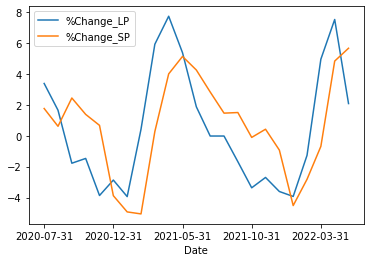

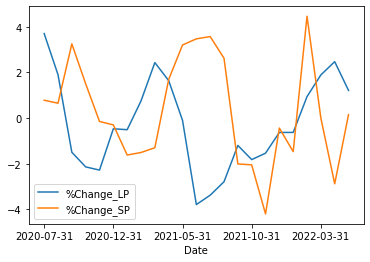

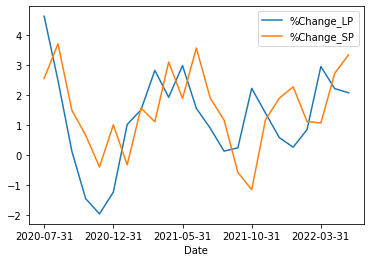

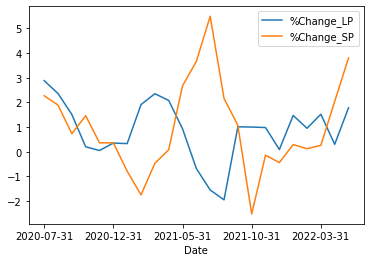

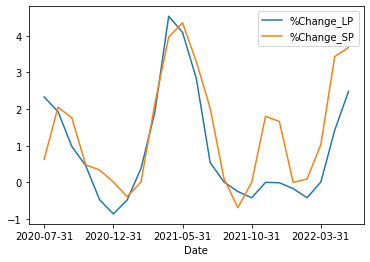

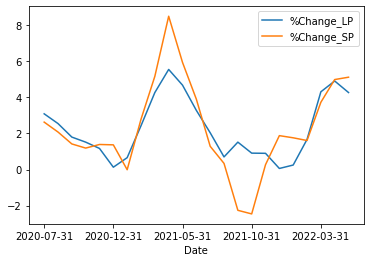

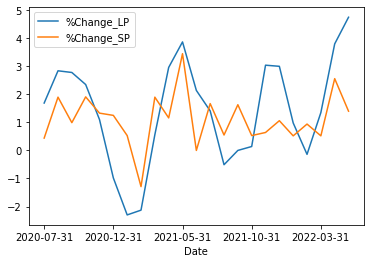

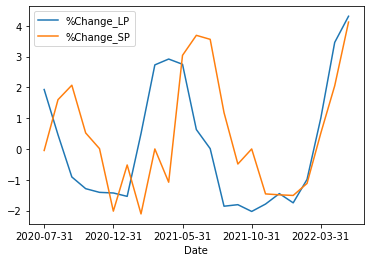

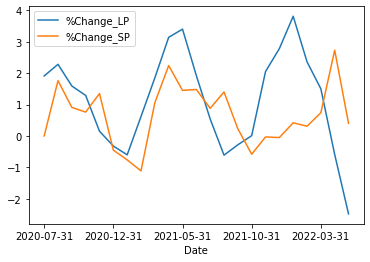

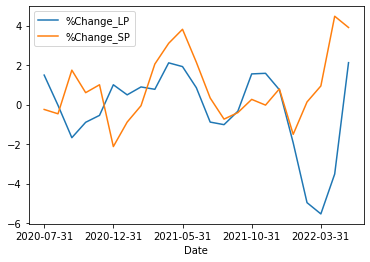

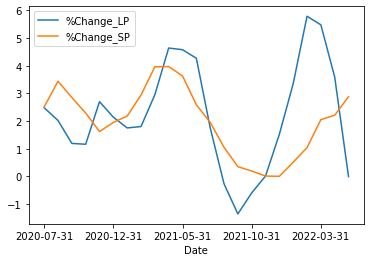

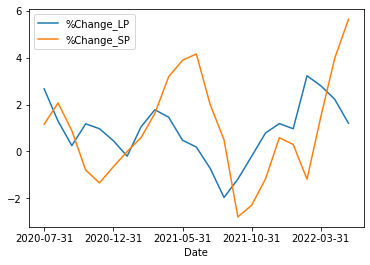

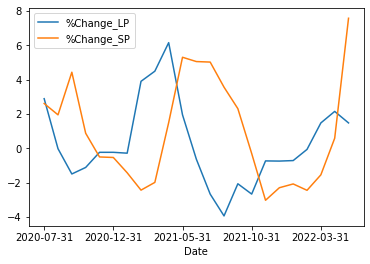

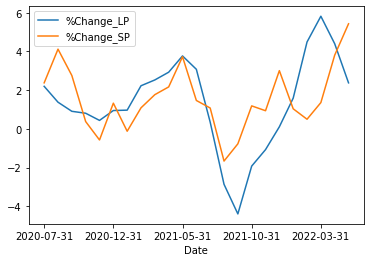

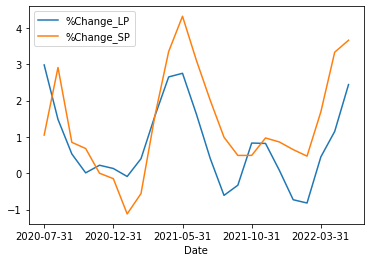

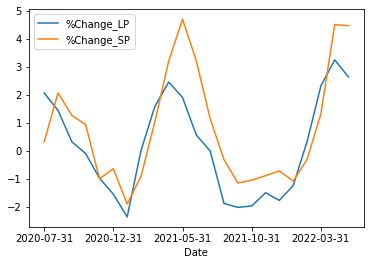

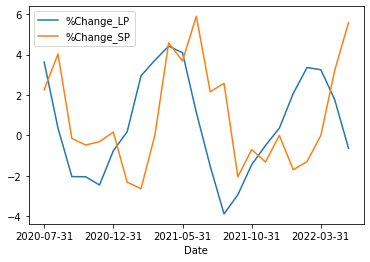

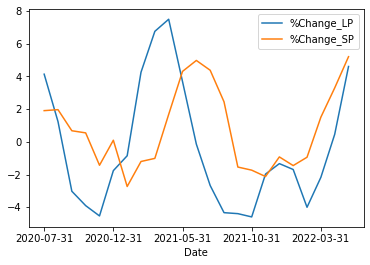

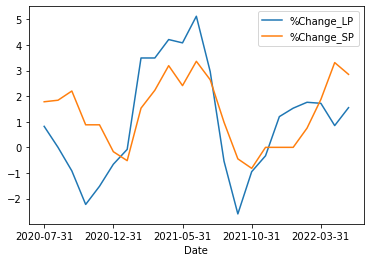

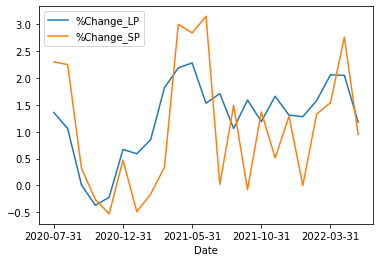

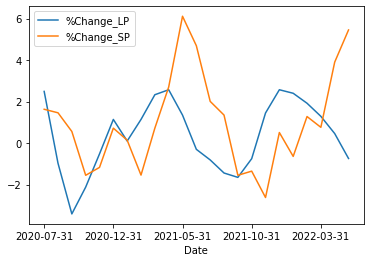

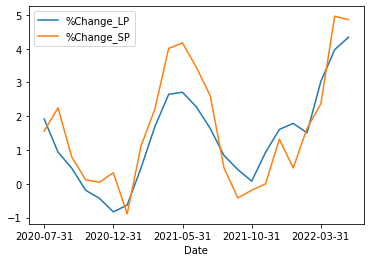

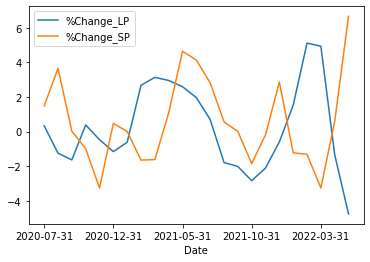

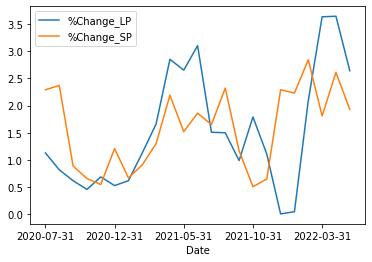

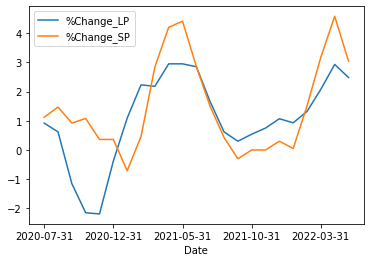

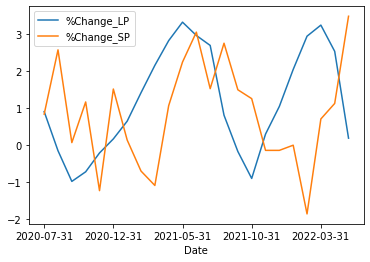

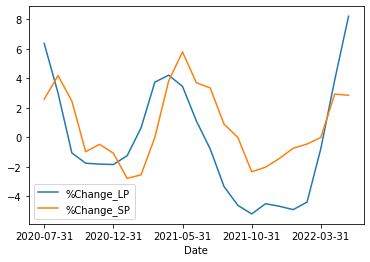

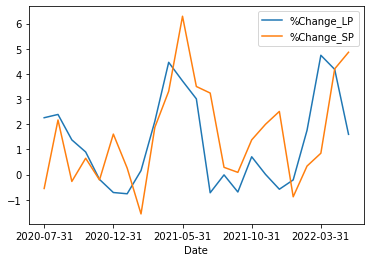

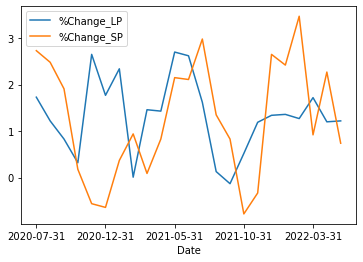

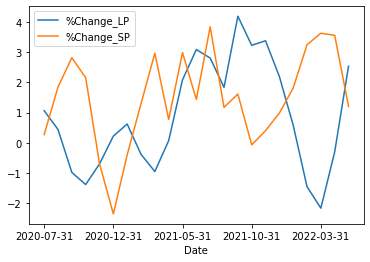

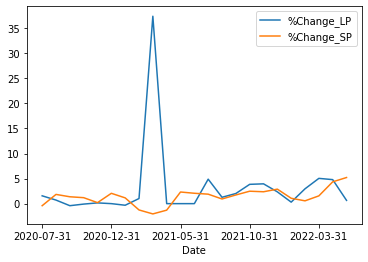

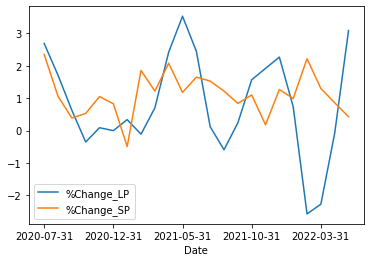

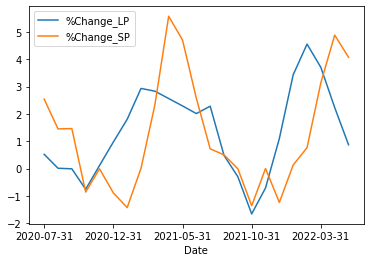

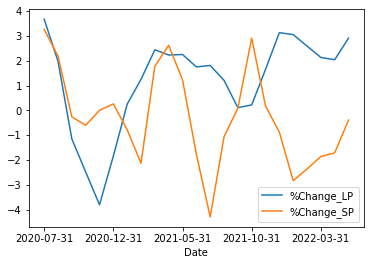

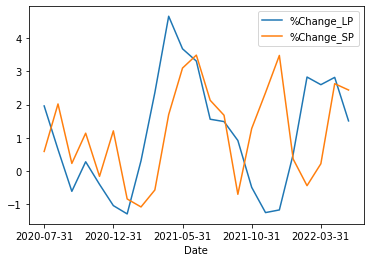

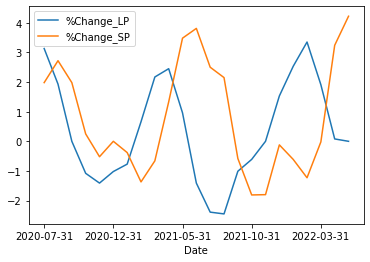

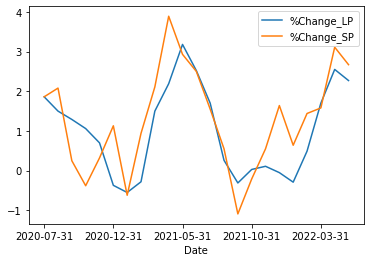

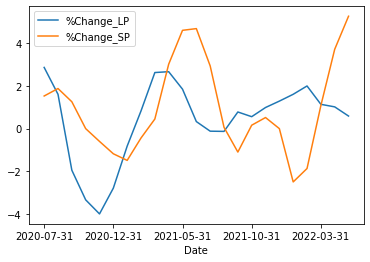

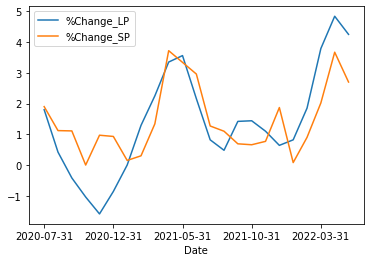

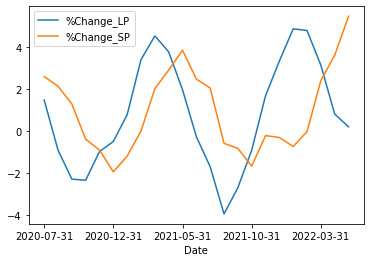

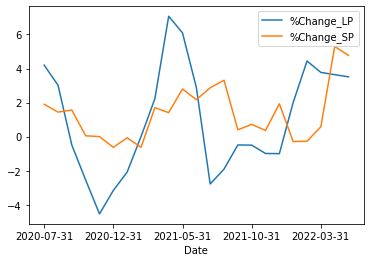

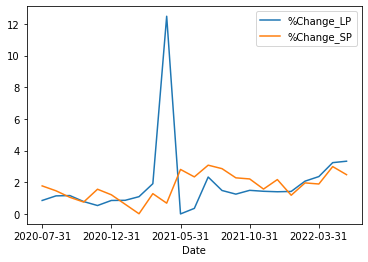

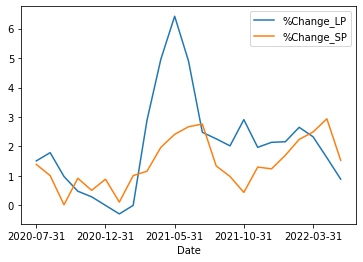

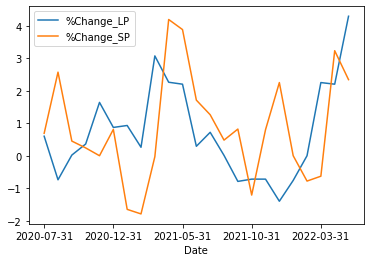

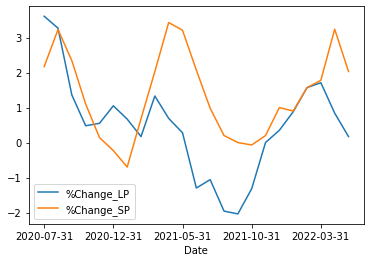

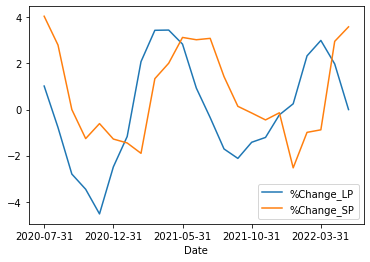

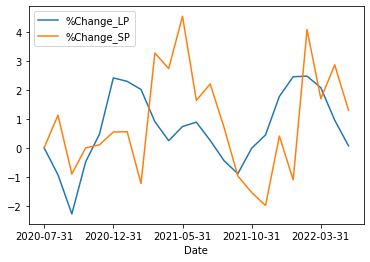

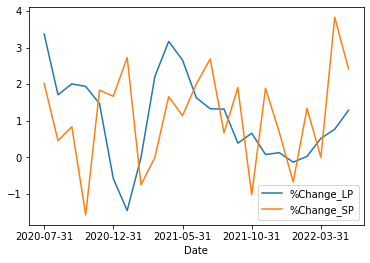

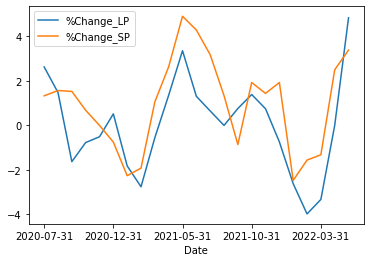

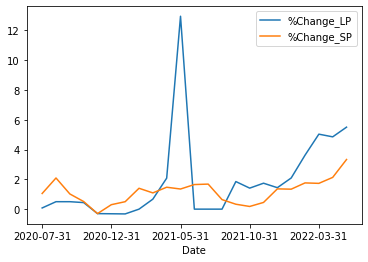

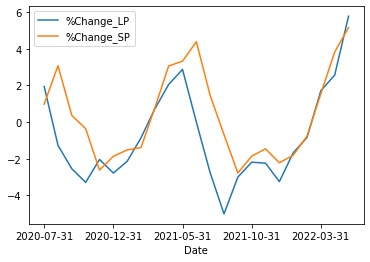

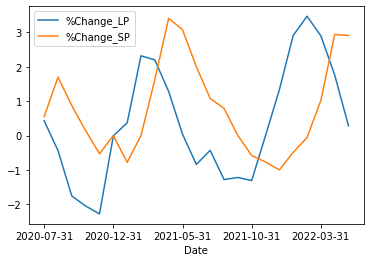

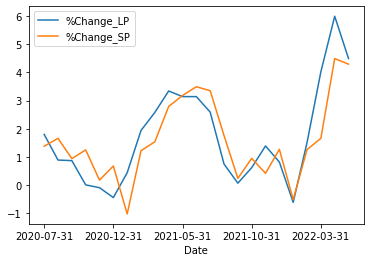

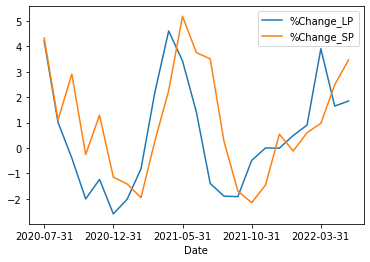

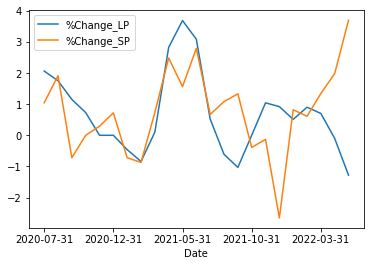

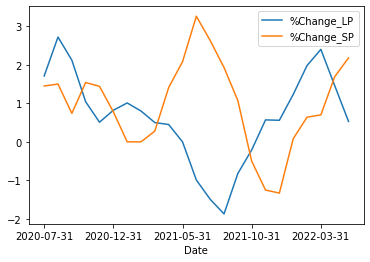

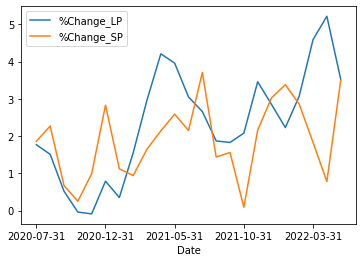

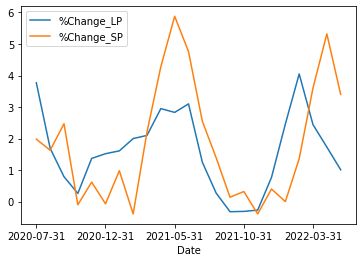

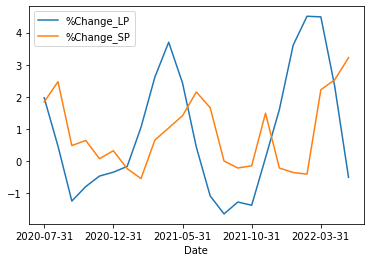

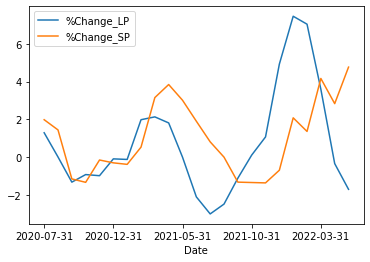

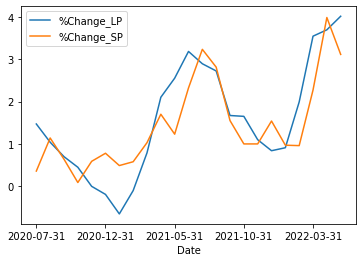

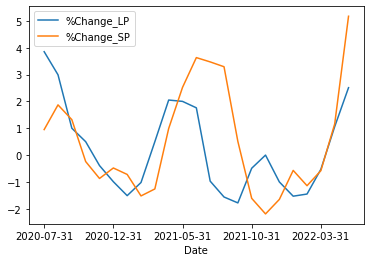

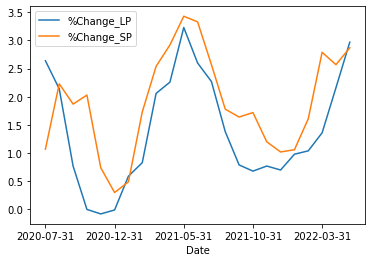

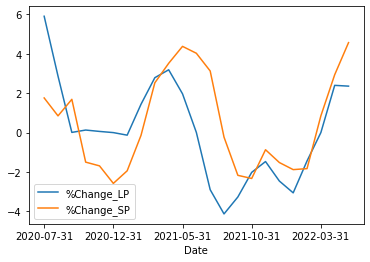

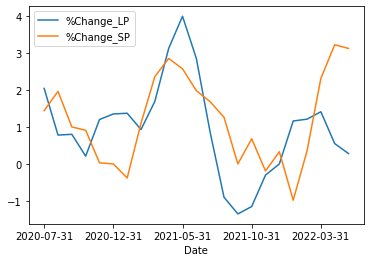

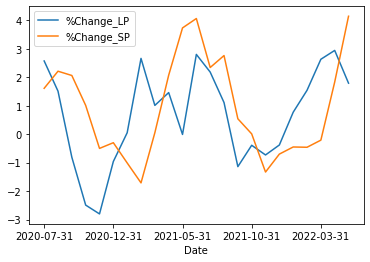

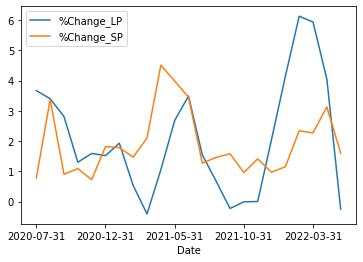

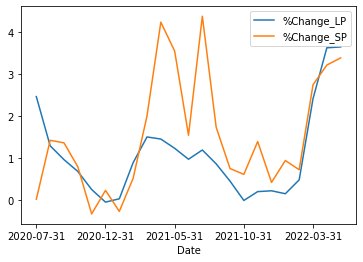

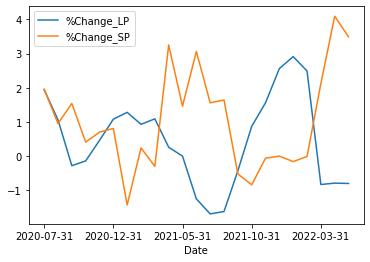

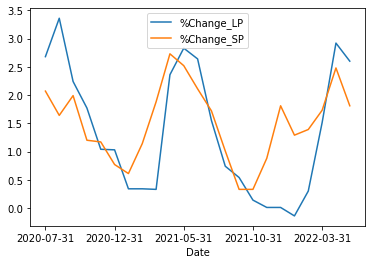

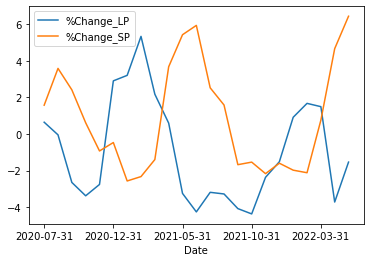

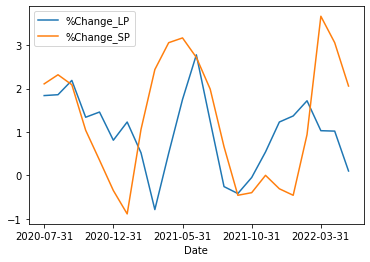

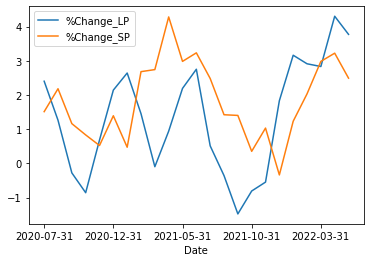

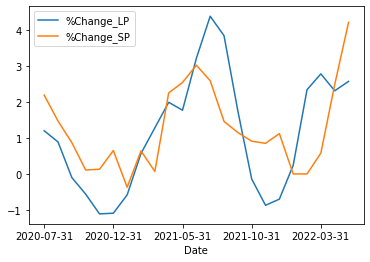

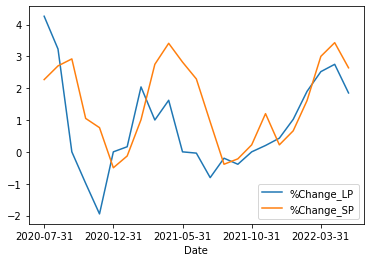

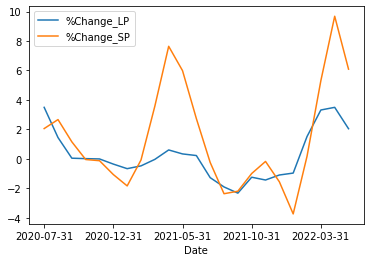

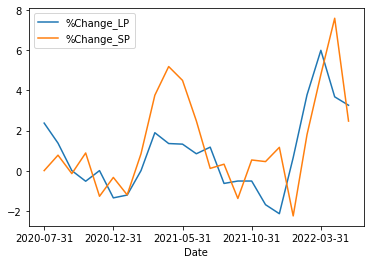

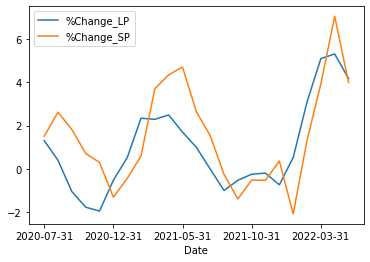

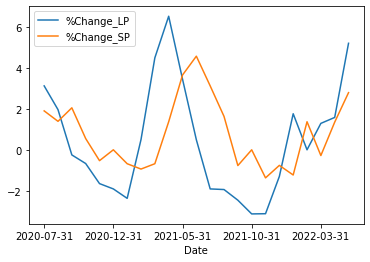

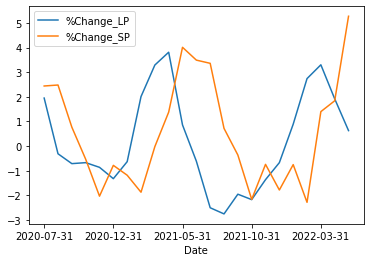

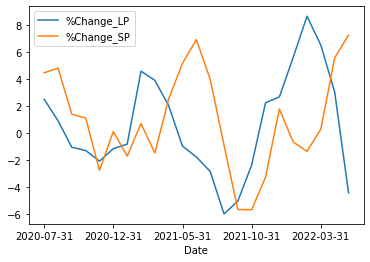

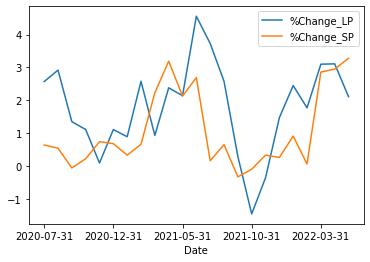

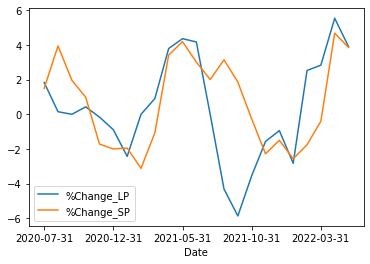

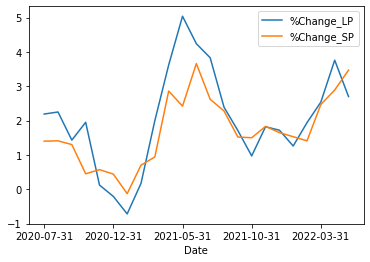

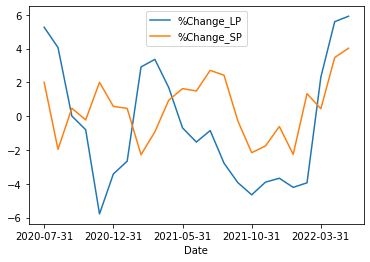

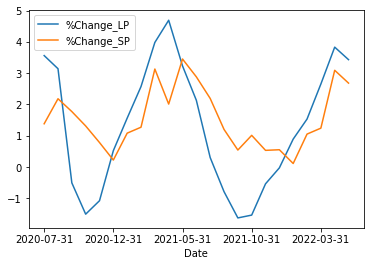

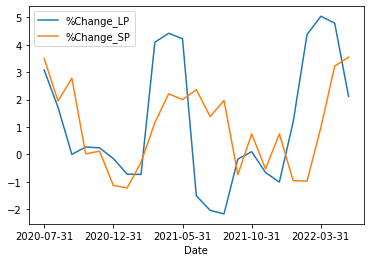

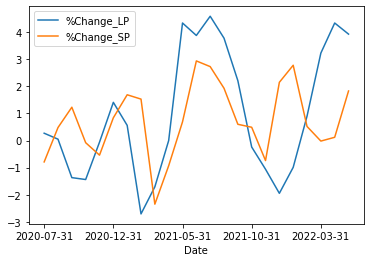

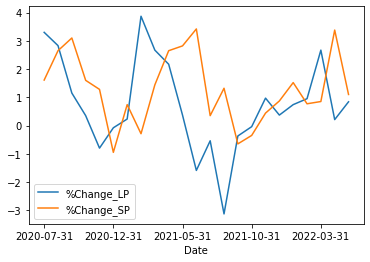

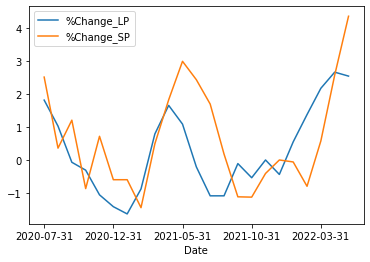

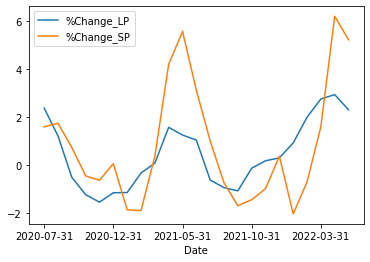

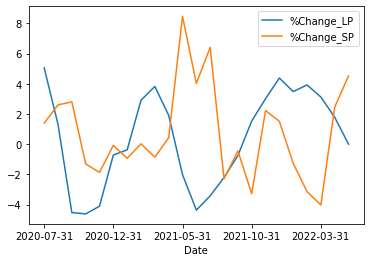

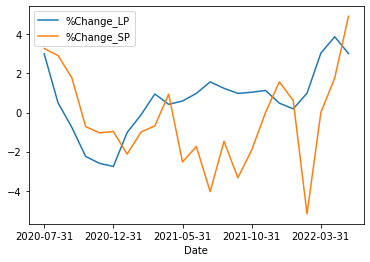

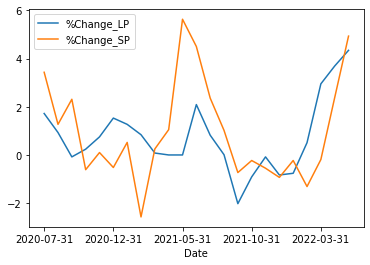

In [91]:
list_sale_data.groupby('City').plot(x='Date', y=['%Change_LP', '%Change_SP'])

In [129]:
# Merge hvi_by_month and rent_data_by_month dataframes
df = pd.merge(hvi_by_month, rent_data_by_month[['Date', 'City', 'Avg_Rent', '%Change_Rent' ]],
                        how='left',
                        left_on=['Date', 'City'],
                        right_on=['Date', 'City'])
df

Date                            City State       HVI  \
0      2020-06-30                        New York    NY  488763.0   
1      2020-06-30  Los Angeles-Long Beach-Anaheim    CA  690755.0   
2      2020-06-30                         Chicago    IL  244909.0   
3      2020-06-30               Dallas-Fort Worth    TX  263317.0   
4      2020-06-30                    Philadelphia    PA  257611.0   
...           ...                             ...   ...       ...   
16620  2022-06-30                         Andrews    TX  221347.0   
16621  2022-06-30                          Zapata    TX  117079.0   
16622  2022-06-30                      Vermillion    SD  231123.0   
16623  2022-06-30                           Pecos    TX  190000.0   
16624  2022-06-30                       Ketchikan    AK  363980.0   

       %Change_HVI  Avg_Rent  %Change_Rent  
0              NaN    2694.0           NaN  
1              NaN    2446.0           NaN  
2              NaN    1727.0           NaN  
3              NaN    1428.0           NaN  
4              NaN    1589.0           NaN  
...            ...       ...           ...  
16620         1.44       NaN           NaN  
16621         0.85       NaN           NaN  
16622         1.12       NaN           NaN  
16623         1.67       NaN           NaN  
16624         0.97       NaN           NaN  

[16625 rows x 7 columns]

In [130]:
# Drop rows with NaN values
#df[ 'Avg_Rent']= df['Avg_Rent'].apply(pd.to_numeric, errors='coerce')
hvi_rent_data= df.dropna().reset_index(drop=True)
hvi_rent_data

Date                            City State       HVI  %Change_HVI  \
0     2020-07-31                        New York    NY  489984.0         0.25   
1     2020-07-31  Los Angeles-Long Beach-Anaheim    CA  692496.0         0.25   
2     2020-07-31                         Chicago    IL  245927.0         0.42   
3     2020-07-31               Dallas-Fort Worth    TX  264380.0         0.40   
4     2020-07-31                    Philadelphia    PA  259242.0         0.63   
...          ...                             ...   ...       ...          ...   
3115  2022-06-30                      Greenville    OH  175984.0       -41.70   
3116  2022-06-30                    Jacksonville    IL  111365.0       -52.69   
3117  2022-06-30                          Austin    MN  175976.0       -70.35   
3118  2022-06-30                         Jackson    WY  969102.0       438.84   
3119  2022-06-30                       Las Vegas    NM  200799.0       -55.74   

      Avg_Rent  %Change_Rent  
0       2663.0         -1.15  
1       2446.0          0.00  
2       1723.0         -0.23  
3       1431.0          0.21  
4       1590.0          0.06  
...        ...           ...  
3115    1513.0          1.54  
3116    1783.0          0.39  
3117    1895.0          1.17  
3118    1383.0         -1.21  
3119    1884.0          0.27  

[3120 rows x 7 columns]

In [94]:
hvi_rent_data.hvplot.scatter(x='%Change_HVI', y='%Change_Rent')

:Scatter   [%Change_HVI]   (%Change_Rent)

<AxesSubplot:xlabel='City'>

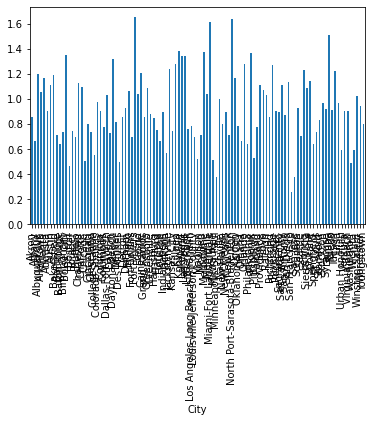

In [95]:
hvi_rent_data.groupby('City')['%Change_Rent'].mean().plot(kind='bar')


City
Akron            AxesSubplot(0.125,0.125;0.775x0.755)
Albany           AxesSubplot(0.125,0.125;0.775x0.755)
Albuquerque      AxesSubplot(0.125,0.125;0.775x0.755)
Allentown        AxesSubplot(0.125,0.125;0.775x0.755)
Atlanta          AxesSubplot(0.125,0.125;0.775x0.755)
                                 ...                 
Washington       AxesSubplot(0.125,0.125;0.775x0.755)
Wichita          AxesSubplot(0.125,0.125;0.775x0.755)
Winston-Salem    AxesSubplot(0.125,0.125;0.775x0.755)
Worcester        AxesSubplot(0.125,0.125;0.775x0.755)
Youngstown       AxesSubplot(0.125,0.125;0.775x0.755)
Length: 107, dtype: object

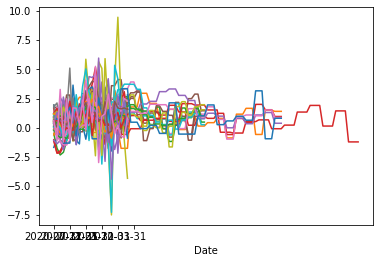

In [96]:
fig, ax = plt.subplots()
hvi_rent_data.groupby('City').plot(x='Date', y='%Change_Rent', ax=ax, legend=False)

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


City
Akron            AxesSubplot(0.125,0.125;0.775x0.755)
Albany           AxesSubplot(0.125,0.125;0.775x0.755)
Albuquerque      AxesSubplot(0.125,0.125;0.775x0.755)
Allentown        AxesSubplot(0.125,0.125;0.775x0.755)
Atlanta          AxesSubplot(0.125,0.125;0.775x0.755)
                                 ...                 
Washington       AxesSubplot(0.125,0.125;0.775x0.755)
Wichita          AxesSubplot(0.125,0.125;0.775x0.755)
Winston-Salem    AxesSubplot(0.125,0.125;0.775x0.755)
Worcester        AxesSubplot(0.125,0.125;0.775x0.755)
Youngstown       AxesSubplot(0.125,0.125;0.775x0.755)
Length: 107, dtype: object

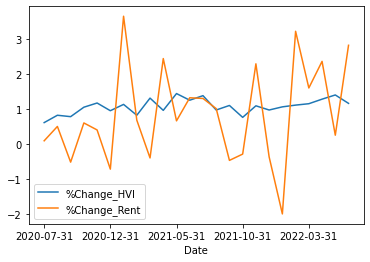

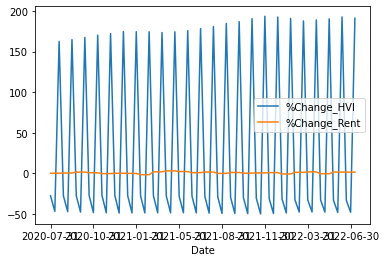

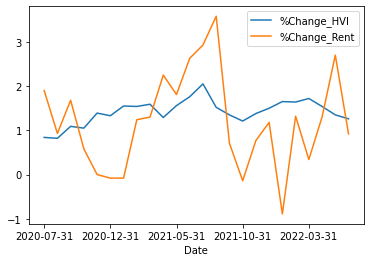

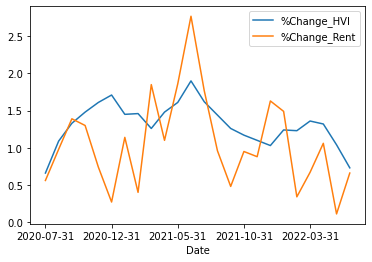

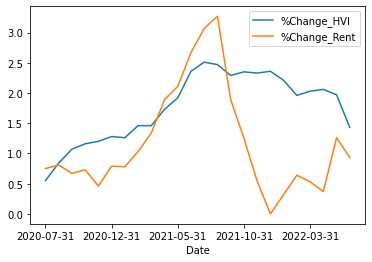

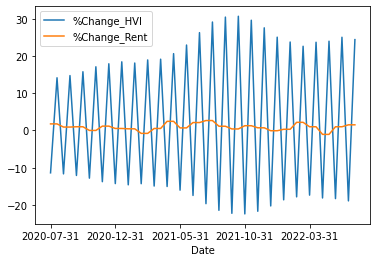

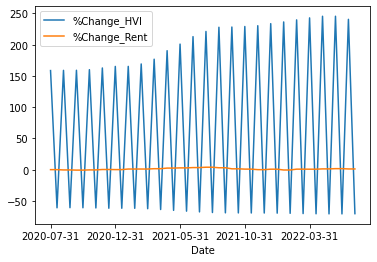

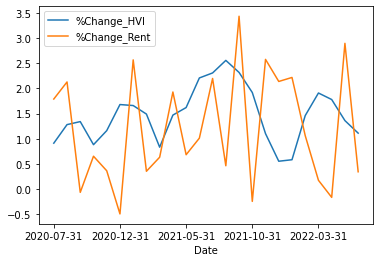

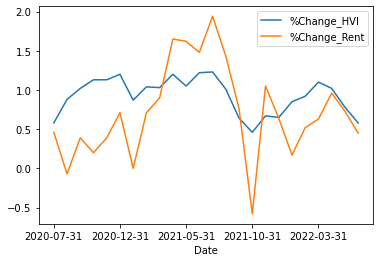

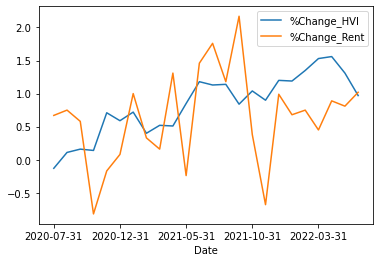

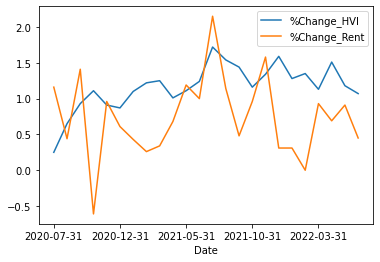

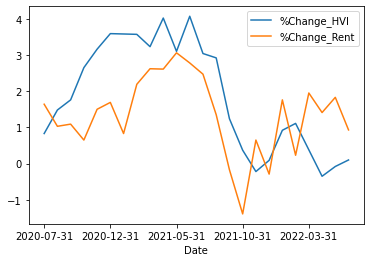

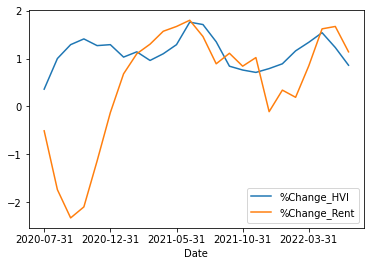

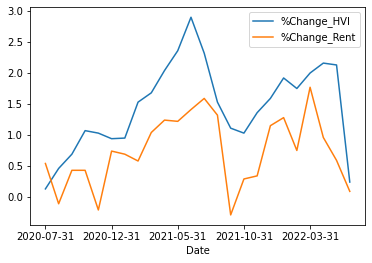

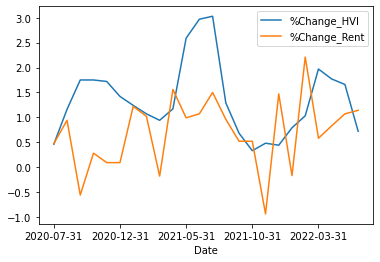

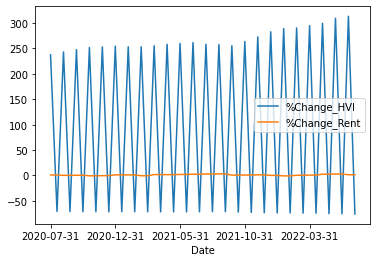

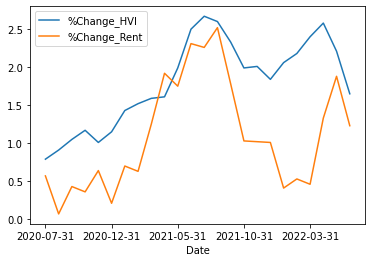

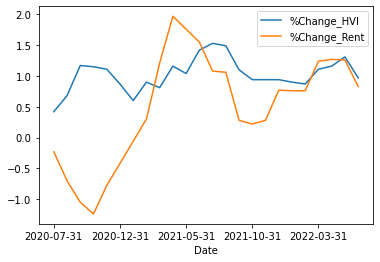

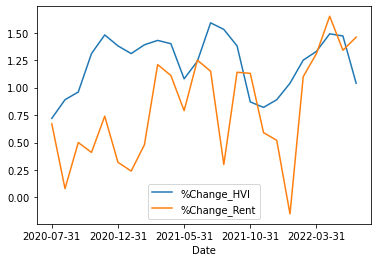

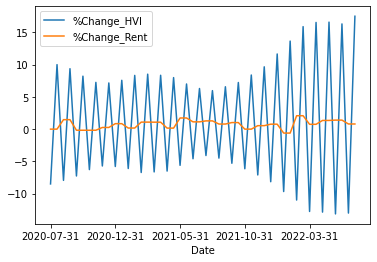

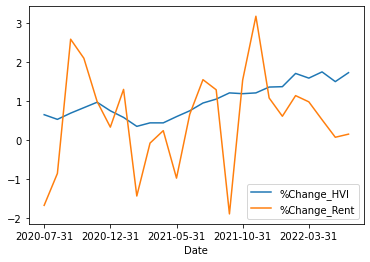

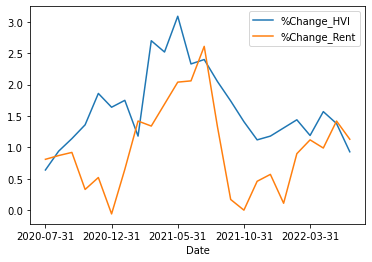

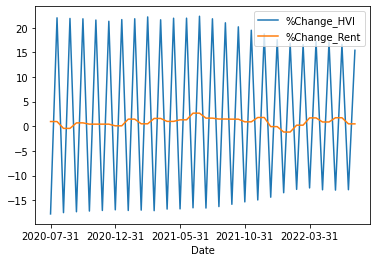

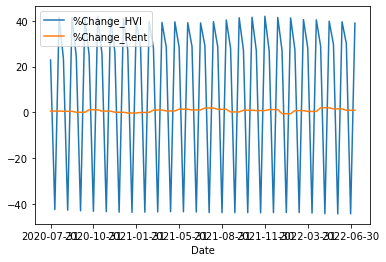

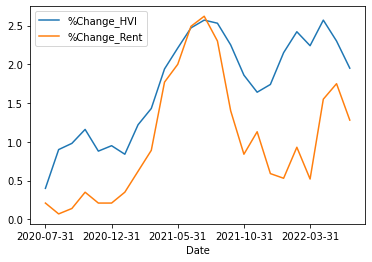

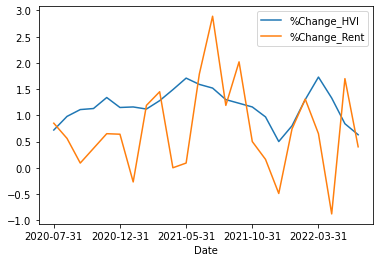

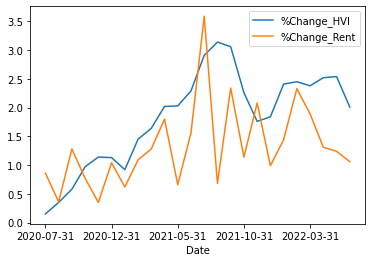

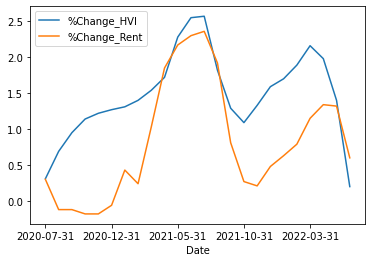

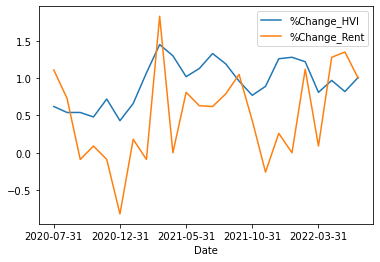

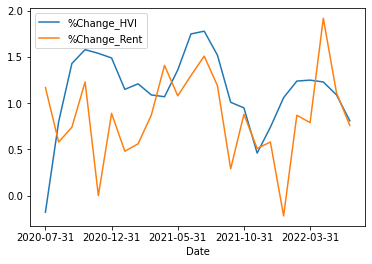

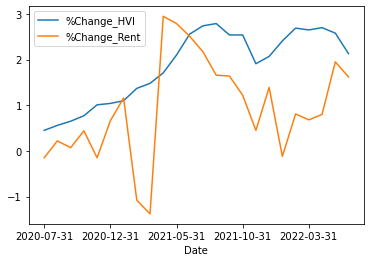

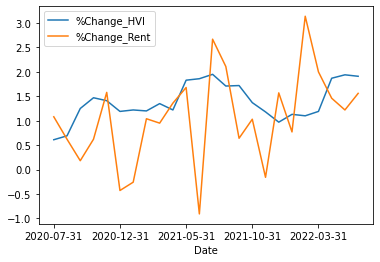

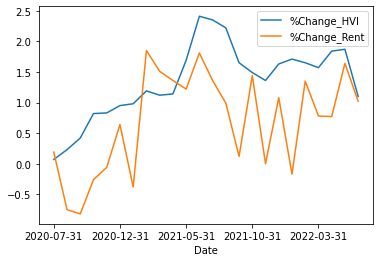

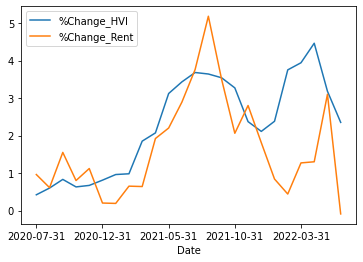

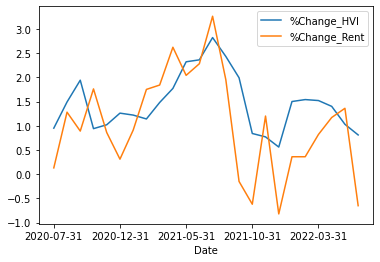

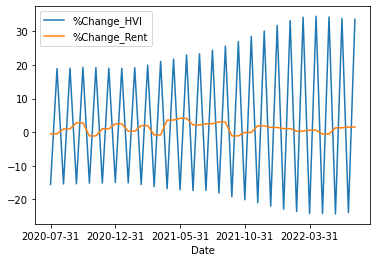

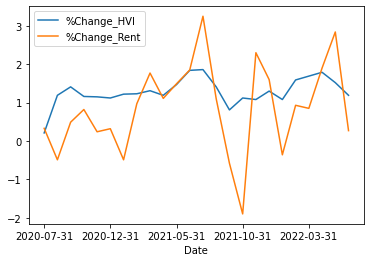

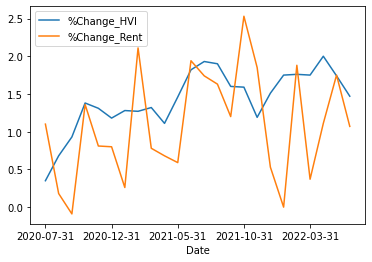

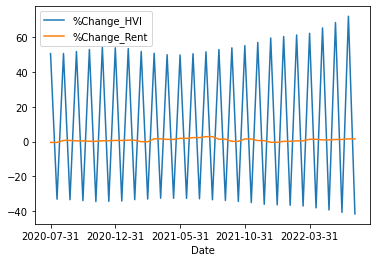

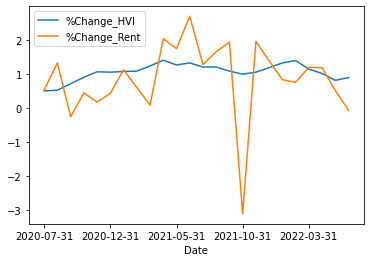

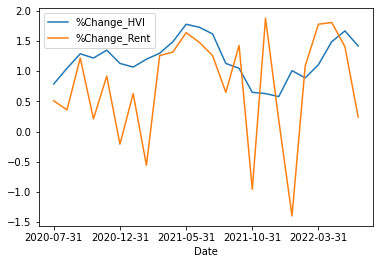

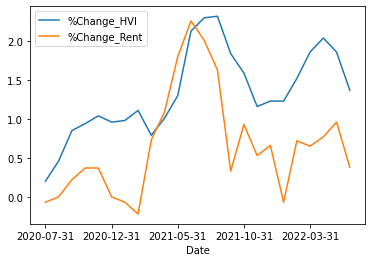

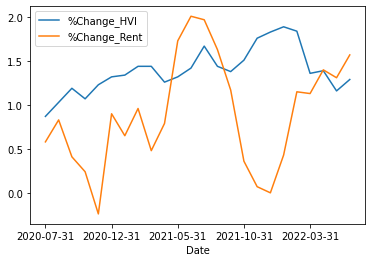

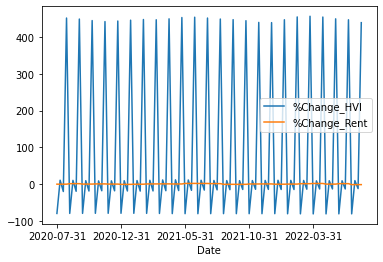

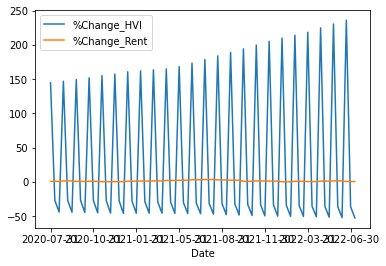

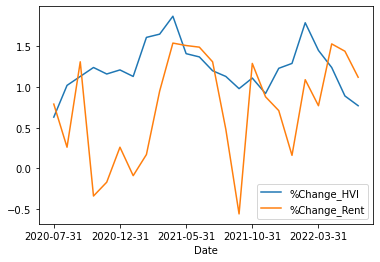

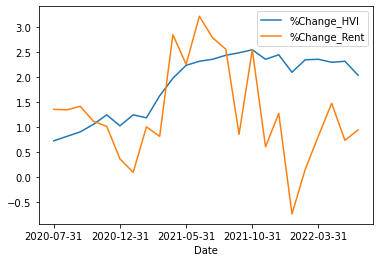

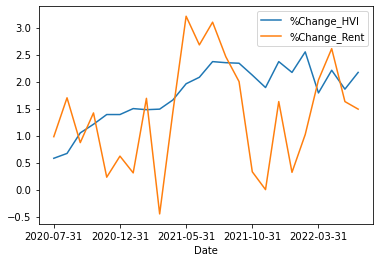

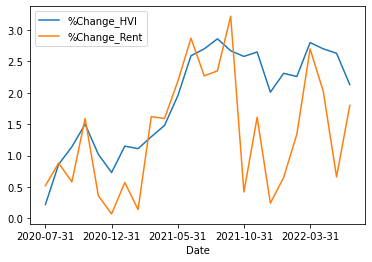

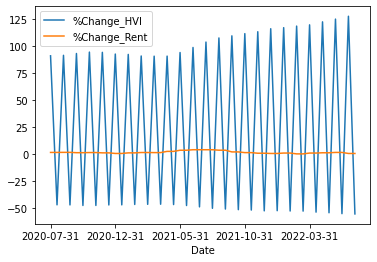

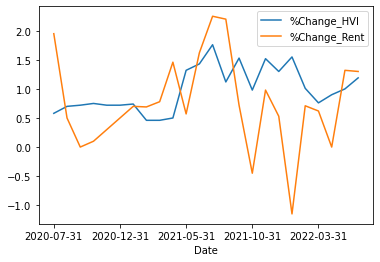

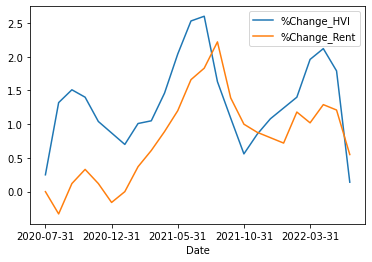

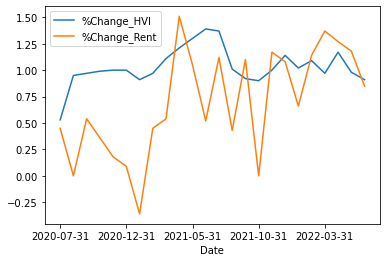

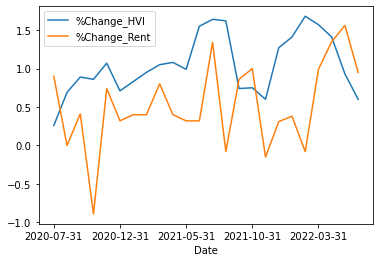

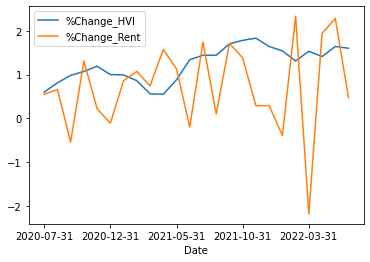

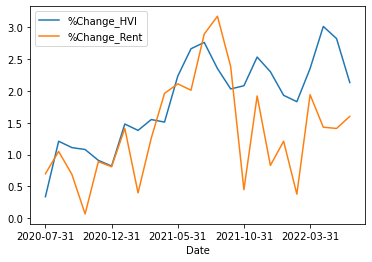

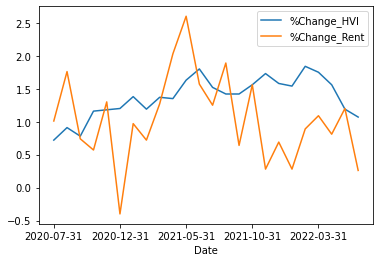

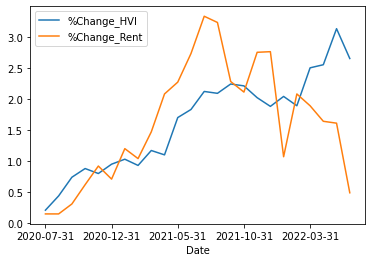

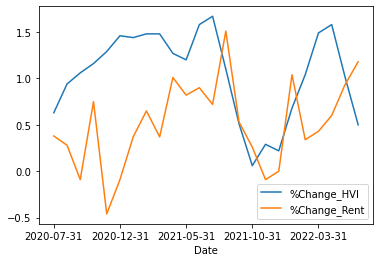

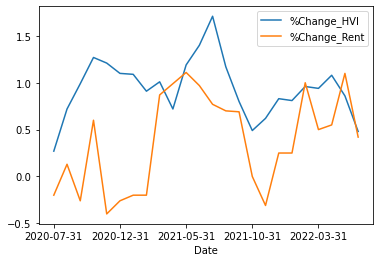

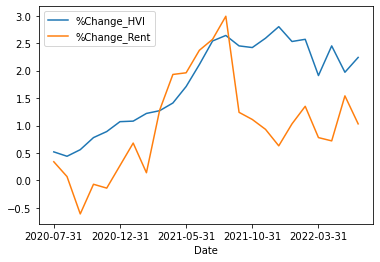

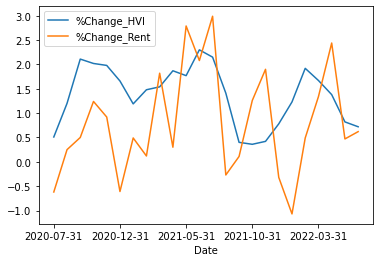

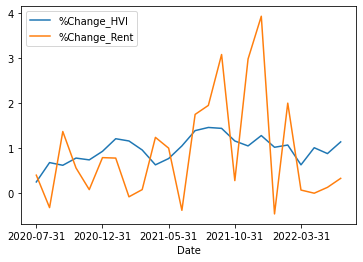

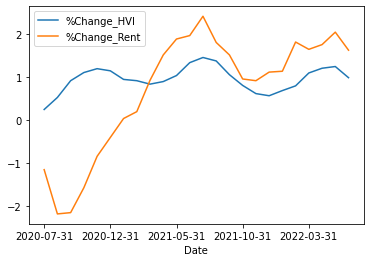

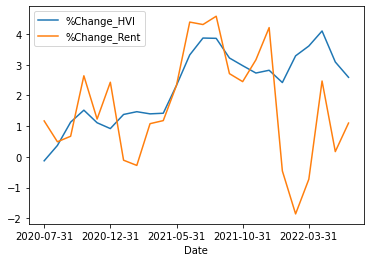

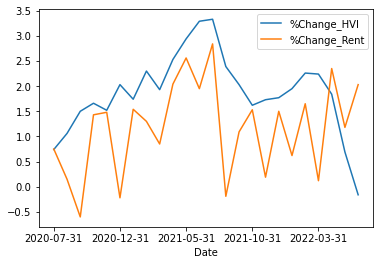

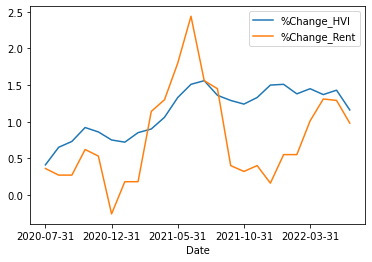

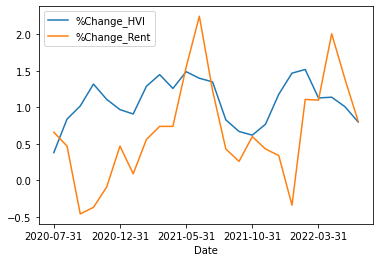

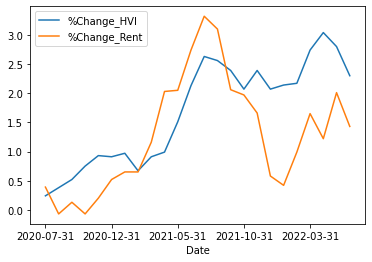

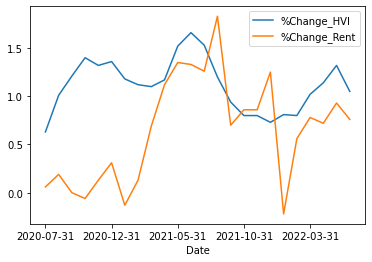

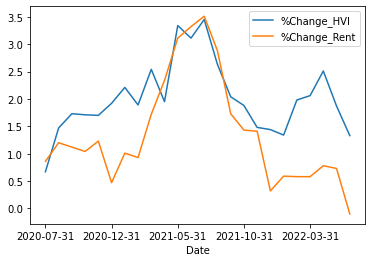

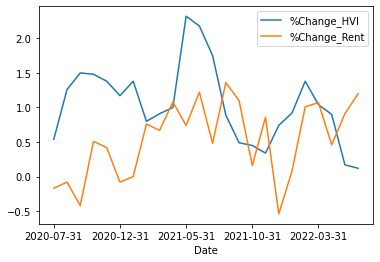

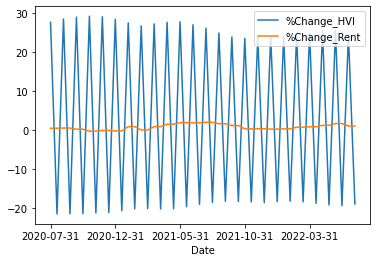

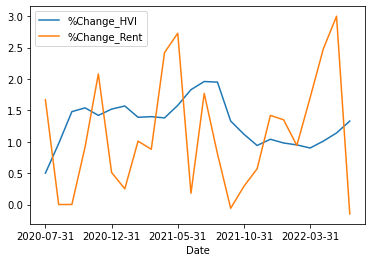

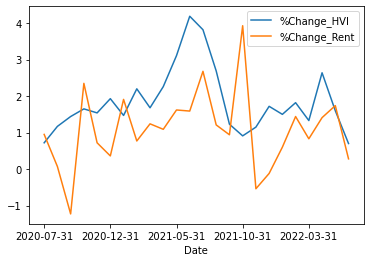

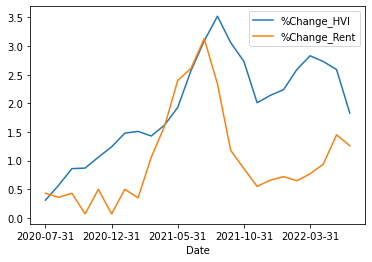

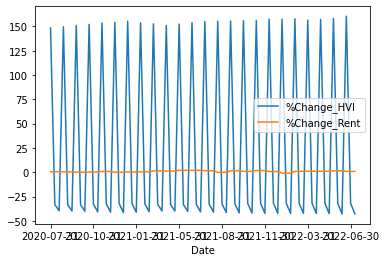

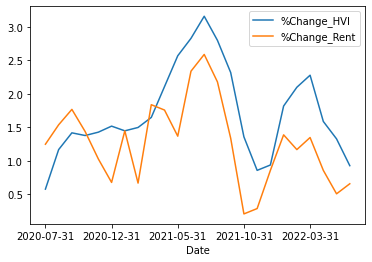

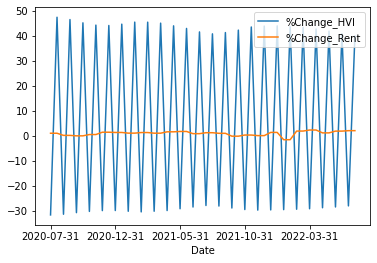

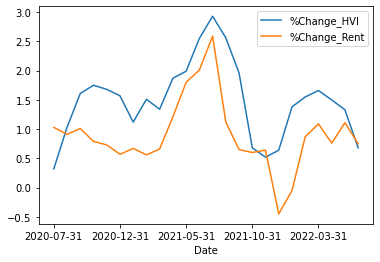

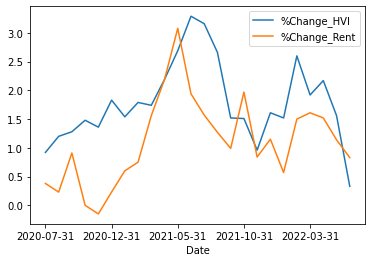

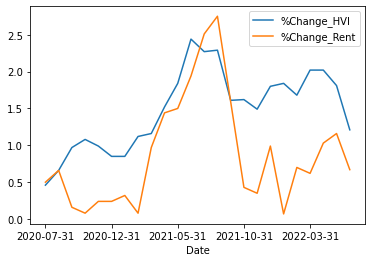

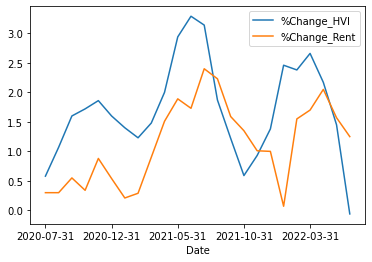

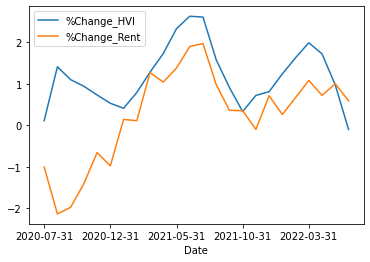

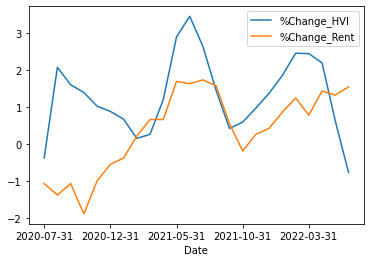

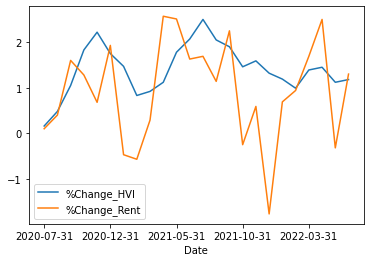

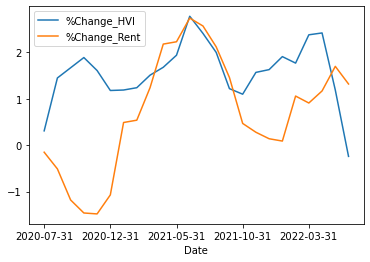

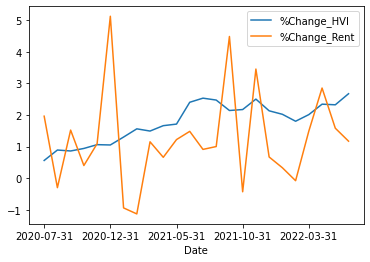

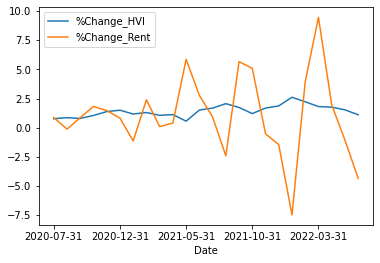

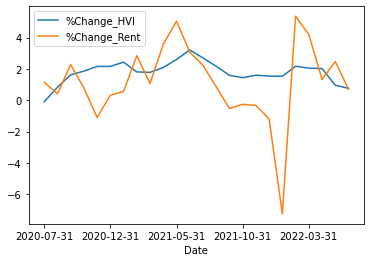

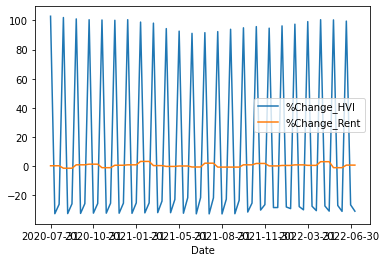

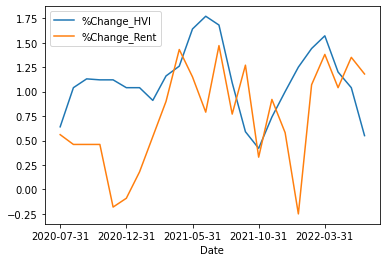

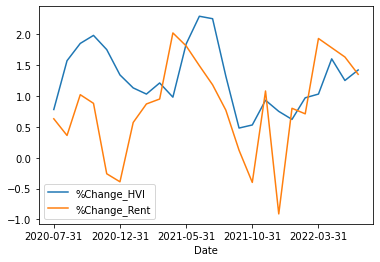

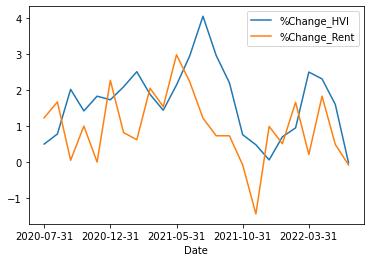

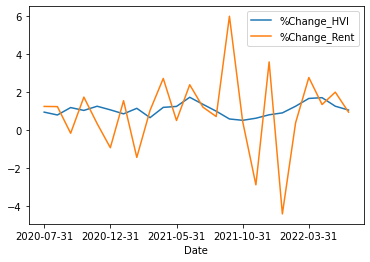

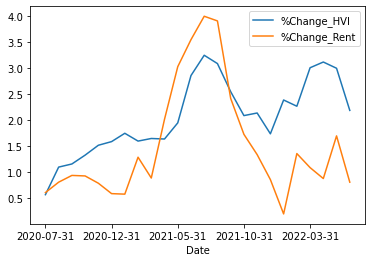

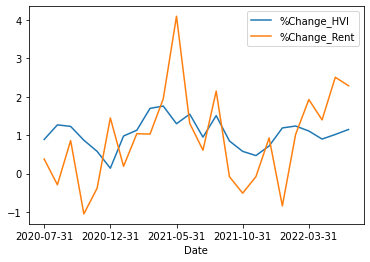

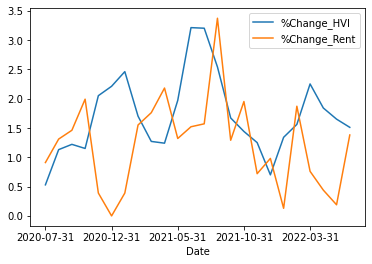

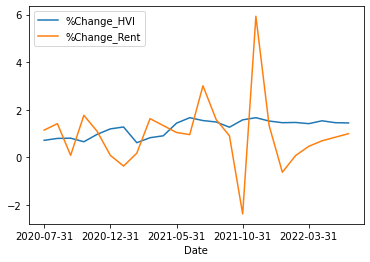

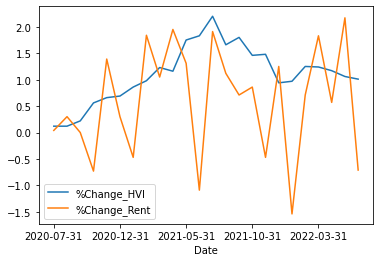

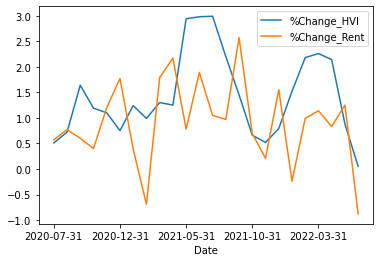

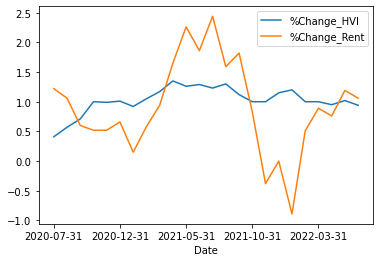

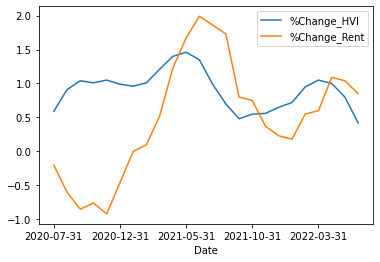

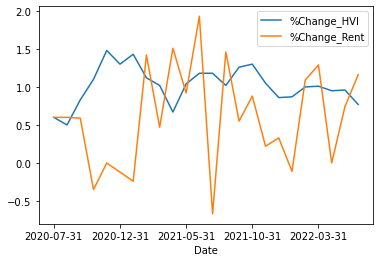

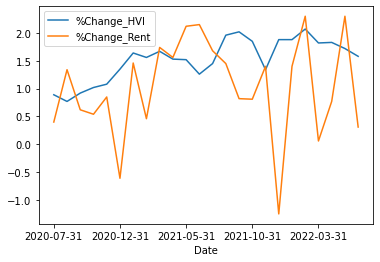

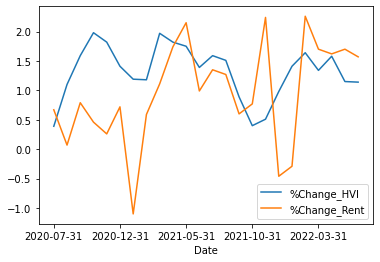

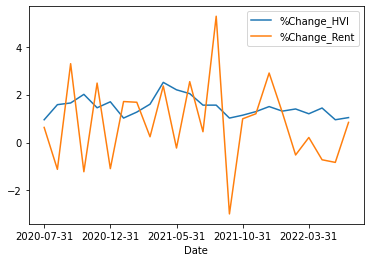

In [97]:
hvi_rent_data.groupby('City').plot(x='Date', y=['%Change_HVI', '%Change_Rent'])

## Machine Learning Tests


In [98]:
# Drop Date, City, State columns for machine learning dataframe
ml_hvi_rent = hvi_rent_data.drop(columns=['Date', 'City', 'State'])
ml_hvi_rent.head()

HVI  %Change_HVI  Avg_Rent  %Change_Rent
0  489984.0         0.25    2663.0         -1.15
1  692496.0         0.25    2446.0          0.00
2  245927.0         0.42    1723.0         -0.23
3  264380.0         0.40    1431.0          0.21
4  259242.0         0.63    1590.0          0.06

In [99]:
# Test unsupervised machine learning model
from sklearn.cluster import KMeans

# Initialize instance of model
model = KMeans(n_clusters=2, random_state=5)

# Fit model
model.fit(ml_hvi_rent)

# Get the predictions
predictions = model.predict(ml_hvi_rent)
print(predictions)


[0 0 1 ... 1 0 1]


In [100]:
# Add class column to dataframe with predictions
ml_hvi_rent['Class'] = model.labels_
ml_hvi_rent.head()

HVI  %Change_HVI  Avg_Rent  %Change_Rent  Class
0  489984.0         0.25    2663.0         -1.15      0
1  692496.0         0.25    2446.0          0.00      0
2  245927.0         0.42    1723.0         -0.23      1
3  264380.0         0.40    1431.0          0.21      1
4  259242.0         0.63    1590.0          0.06      1

In [101]:
# Create a scatter plot of ml_hvi_rent
ml_hvi_rent.hvplot.scatter(x='%Change_HVI', y='%Change_Rent', by='Class')

:NdOverlay   [Class]
   :Scatter   [%Change_HVI]   (%Change_Rent)

In [102]:
# Scale data and fit to model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(ml_hvi_rent)
X_scaled

array([[ 0.82670442, -0.16257803,  2.57533717, -1.97818005, -2.47781922],
       [ 1.80898813, -0.16257803,  2.07581767, -0.87474726, -2.47781922],
       [-0.35709315, -0.15971673,  0.41151999, -1.09543382,  0.40358069],
       ...,
       [-0.69639022, -1.35085851,  0.80745249,  0.24787566,  0.40358069],
       [ 3.1506645 ,  7.2194041 , -0.37113729, -2.03575046, -2.47781922],
       [-0.57598635, -1.10495514,  0.78213123, -0.61568044,  0.40358069]])

In [103]:
# Initialize instance of model
model = KMeans(n_clusters=2, random_state=5)

model.fit(X_scaled)
predictions = model.predict(X_scaled)
print(predictions)

[0 0 1 ... 1 0 1]


In [104]:
ml_hvi_rent['Class'] = model.labels_
ml_hvi_rent.head()

HVI  %Change_HVI  Avg_Rent  %Change_Rent  Class
0  489984.0         0.25    2663.0         -1.15      0
1  692496.0         0.25    2446.0          0.00      0
2  245927.0         0.42    1723.0         -0.23      1
3  264380.0         0.40    1431.0          0.21      1
4  259242.0         0.63    1590.0          0.06      1

In [105]:
# Create a scatter plot of ml_hvi_rent
ml_hvi_rent.hvplot.scatter(x='%Change_HVI', y='%Change_Rent', by='Class')

:NdOverlay   [Class]
   :Scatter   [%Change_HVI]   (%Change_Rent)

In [106]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
# Define DataFrame and plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [107]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X_scaled)

# Predict clusters
predictions = model.predict(X_scaled)
predictions

array([1, 1, 0, ..., 2, 3, 0])

In [108]:
ml_hvi_rent['Class'] = model.labels_
ml_hvi_rent.head()

HVI  %Change_HVI  Avg_Rent  %Change_Rent  Class
0  489984.0         0.25    2663.0         -1.15      1
1  692496.0         0.25    2446.0          0.00      1
2  245927.0         0.42    1723.0         -0.23      0
3  264380.0         0.40    1431.0          0.21      0
4  259242.0         0.63    1590.0          0.06      0

In [109]:
# Create a scatter plot of ml_hvi_rent
ml_hvi_rent.hvplot.scatter(x='%Change_HVI', y='%Change_Rent', by='Class')

:NdOverlay   [Class]
   :Scatter   [%Change_HVI]   (%Change_Rent)